In [1]:
# Import libraries

import pandas as pd
import phik
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from pylab import rcParams

rcParams['figure.figsize'] = 25, 15

# для построения моделей воспользуемся sklearn

import sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [1281]:

pd.set_option('display.float_format', lambda x: '%.3f' % x)  #выключаем scintific notation

Dataset loading

In [2]:
DF_Adventure = pd.read_csv('DF_Adventure.csv')

In [3]:
DF_Sci_Fi = pd.read_csv('DF_Sci_Fi.csv')

In [4]:
DF_Fantasy = pd.read_csv('DF_Fantasy.csv')

In [5]:
DF_Western = pd.read_csv('Western.csv')

In [6]:
# DF_Adventure = DF_Adventure.drop('good_film_summ', axis=1)

In [21]:
DF_Adventure

,title_year,gross,budget,marga,marga_coef,imdb_score,director_name,actor_1_name,num_voted_users,movie_facebook_likes,film_class,good_film_summ,year_class
0,2009.0,760505847.0,237000000.0,523505847.0,3.208885,7.9,James Cameron,CCH Pounder,886204,33000,1,2,1
1,2007.0,309404152.0,300000000.0,9404152.0,1.031347,7.1,Gore Verbinski,Johnny Depp,471220,0,0,4,1
2,2015.0,200074175.0,245000000.0,-44925825.0,0.816629,6.8,Sam Mendes,Christoph Waltz,275868,85000,0,1,0
3,2012.0,73058679.0,263700000.0,-190641321.0,0.277052,6.6,Andrew Stanton,Daryl Sabara,212204,24000,0,7,1
4,2007.0,336530303.0,258000000.0,78530303.0,1.304381,6.2,Sam Raimi,J.K. Simmons,383056,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,2015.0,177343675.0,135000000.0,42343675.0,1.313657,6.7,Tim Johnson,Jim Parsons,70136,26000,0,1,0
889,2013.0,234903076.0,215000000.0,19903076.0,1.092572,6.4,Sam Raimi,Tim Holmes,175413,60000,0,4,1
890,1975.0,1229197.0,229575.0,999622.0,5.354228,8.3,Terry Gilliam,Eric Idle,382240,14000,1,2,1
891,1953.0,5000000.0,210000.0,4790000.0,23.809524,6.7,Eugène Lourié,Kenneth Tobey,4812,465,1,1,0


In [15]:
DF_Sci_Fi

,title_year,gross,budget,marga,marga_coef,imdb_score,director_name,actor_1_name,num_voted_users,movie_facebook_likes,film_class,good_film_summ,year_class
0,2009.0,760505847.0,237000000.0,523505847.0,3.208885,7.9,James Cameron,CCH Pounder,886204,33000,1,4,1
1,2012.0,73058679.0,263700000.0,-190641321.0,0.277052,6.6,Andrew Stanton,Daryl Sabara,212204,24000,0,4,1
2,2015.0,458991599.0,250000000.0,208991599.0,1.835966,7.5,Joss Whedon,Chris Hemsworth,462669,118000,0,3,1
3,2016.0,330249062.0,250000000.0,80249062.0,1.320996,6.9,Zack Snyder,Henry Cavill,371639,197000,0,3,1
4,2006.0,200069408.0,209000000.0,-8930592.0,0.957270,6.1,Bryan Singer,Kevin Spacey,240396,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2015.0,83565.0,75000.0,8565.0,1.114200,4.5,Brett Piper,Michelle Simone Miller,48,34,0,3,1
555,1962.0,43850.0,62000.0,-18150.0,0.707258,4.1,Joseph Green,Virginia Leith,4752,1000,0,0,0
556,2014.0,2595000.0,4000000.0,-1405000.0,0.648750,6.1,William Eubank,Lin Shaye,48236,10000,0,5,1
557,2014.0,8800.0,75000.0,-66200.0,0.117333,5.0,Kirk Loudon,Barry Corbin,34,87,0,5,1


In [16]:
DF_Fantasy

,title_year,gross,budget,marga,marga_coef,imdb_score,director_name,actor_1_name,num_voted_users,movie_facebook_likes,film_class,good_film_summ,year_class
0,2009.0,760505847.0,237000000.0,523505847.0,3.208885,7.9,James Cameron,CCH Pounder,886204,33000,1,2,1
1,2007.0,309404152.0,300000000.0,9404152.0,1.031347,7.1,Gore Verbinski,Johnny Depp,471220,0,0,4,1
2,2010.0,200807262.0,260000000.0,-59192738.0,0.772336,7.8,Nathan Greno,Brad Garrett,294810,29000,0,1,0
3,2009.0,301956980.0,250000000.0,51956980.0,1.207828,7.5,David Yates,Alan Rickman,321795,10000,0,2,1
4,2006.0,423032628.0,225000000.0,198032628.0,1.880145,7.3,Gore Verbinski,Johnny Depp,522040,5000,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1997.0,203134.0,250000.0,-46866.0,0.812536,7.0,Bill Plympton,Charis Michelsen,1428,178,0,1,0
565,1982.0,21000000.0,18000000.0,3000000.0,1.166667,6.1,Paul Schrader,Ed Begley Jr.,14193,0,0,3,1
566,1977.0,7000000.0,20000.0,6980000.0,350.000000,7.4,David Lynch,Hal Landon Jr.,69831,0,1,2,1
567,2005.0,50000.0,50000.0,0.0,1.000000,7.3,Andrew Leman,Dan Novy,6261,0,0,1,0


In [17]:
DF_Western

,title_year,gross,budget,marga,marga_coef,imdb_score,director_name,actor_1_name,num_voted_users,movie_facebook_likes,film_class,good_film_summ,year_class
0,1940.0,9172000.0,1614000.0,7558000.0,5.682776,7.1,900.0,735.0,2269,236,1,1,0
1,1946.0,20400000.0,8000000.0,12400000.0,2.550000,6.9,1315.0,999.0,6304,403,1,1,0
2,1948.0,4506000.0,3000000.0,1506000.0,1.502000,7.8,863.0,1426.0,21316,0,0,0,0
3,1949.0,5400000.0,1600000.0,3800000.0,3.375000,7.4,1101.0,719.0,11920,721,1,1,0
4,1950.0,8000000.0,3768785.0,4231215.0,2.122700,7.0,771.0,1073.0,3167,456,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2015.0,54116191.0,44000000.0,10116191.0,1.229913,7.9,1827.0,395.0,272839,114000,0,0,0
87,2015.0,1300000.0,2000000.0,-700000.0,0.650000,6.9,1123.0,1366.0,27650,0,0,0,0
88,2015.0,183635922.0,135000000.0,48635922.0,1.360266,8.1,44.0,1179.0,406020,190000,0,0,0
89,2015.0,68000.0,2100000.0,-2032000.0,0.032381,5.5,132.0,825.0,1274,380,0,0,0


In [7]:
raw_data = pd.read_csv('imdb_5000_movie_metadata.csv')

In [19]:
raw_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [9]:
ganr_df = pd.read_csv('ganr_df.csv')

In [10]:
ganr_df

,title_year,genres,director_name,actor_1_name,actor_2_name,actor_3_name,num_critic_for_reviews,gross,budget,num_voted_users,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,723.0,760505847.0,237000000.0,886204,...,0,0,0,0,1,0,0,0,0,0
1,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,302.0,309404152.0,300000000.0,471220,...,0,0,0,0,0,0,0,0,0,0
2,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,602.0,200074175.0,245000000.0,275868,...,0,0,0,0,0,0,0,1,0,0
3,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,813.0,448130642.0,250000000.0,1144337,...,0,0,0,0,0,0,0,1,0,0
4,0.0,Documentary,Doug Walker,Doug Walker,Rob Walker,0,0.0,0.0,0.0,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2013.0,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,1.0,0.0,0.0,629,...,0,0,0,0,0,0,0,0,0,0
5039,0.0,Crime|Drama|Mystery|Thriller,0,Natalie Zea,Valorie Curry,Sam Underwood,43.0,0.0,0.0,73839,...,1,0,0,0,0,0,0,1,0,0
5040,2013.0,Drama|Horror|Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,13.0,0.0,1400.0,38,...,0,0,0,0,0,0,0,1,0,0
5041,2012.0,Comedy|Drama|Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,14.0,10443.0,0.0,1255,...,0,0,0,1,0,0,0,0,0,0


In [11]:
norm_ganr = pd.read_csv('C:/Users/Rost/PycharmProjects/Otus/otus/Project/IMDB/norm_ganr_to_years.csv')

In [12]:
norm_ganr

,ganr_coef,coef_1992,coef_1994,coef_2002,coef_2009,coef_2012,coef_2016
0,Animation_coef,0.208404,0.405382,0.066670,0.094968,0.086922,0.137654
1,Adventure_coef,0.191023,0.122013,0.137464,0.168532,0.229060,0.151907
2,Musical_coef,0.207889,0.718566,0.073546,0.000000,0.000000,0.000000
3,Music_coef,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Family_coef,0.193589,0.192169,0.130371,0.138203,0.140801,0.204868
5,Western_coef,0.390988,0.000000,0.282988,0.000000,0.326025,0.000000
6,Comedy_coef,0.420213,0.000000,0.216765,0.000000,0.000000,0.363022
7,Fantasy_coef,0.147799,0.127813,0.228466,0.159921,0.184870,0.151132
8,Sport_coef,0.604993,0.000000,0.000000,0.395007,0.000000,0.000000
9,Action_coef,0.166242,0.119996,0.169664,0.164793,0.212822,0.166482


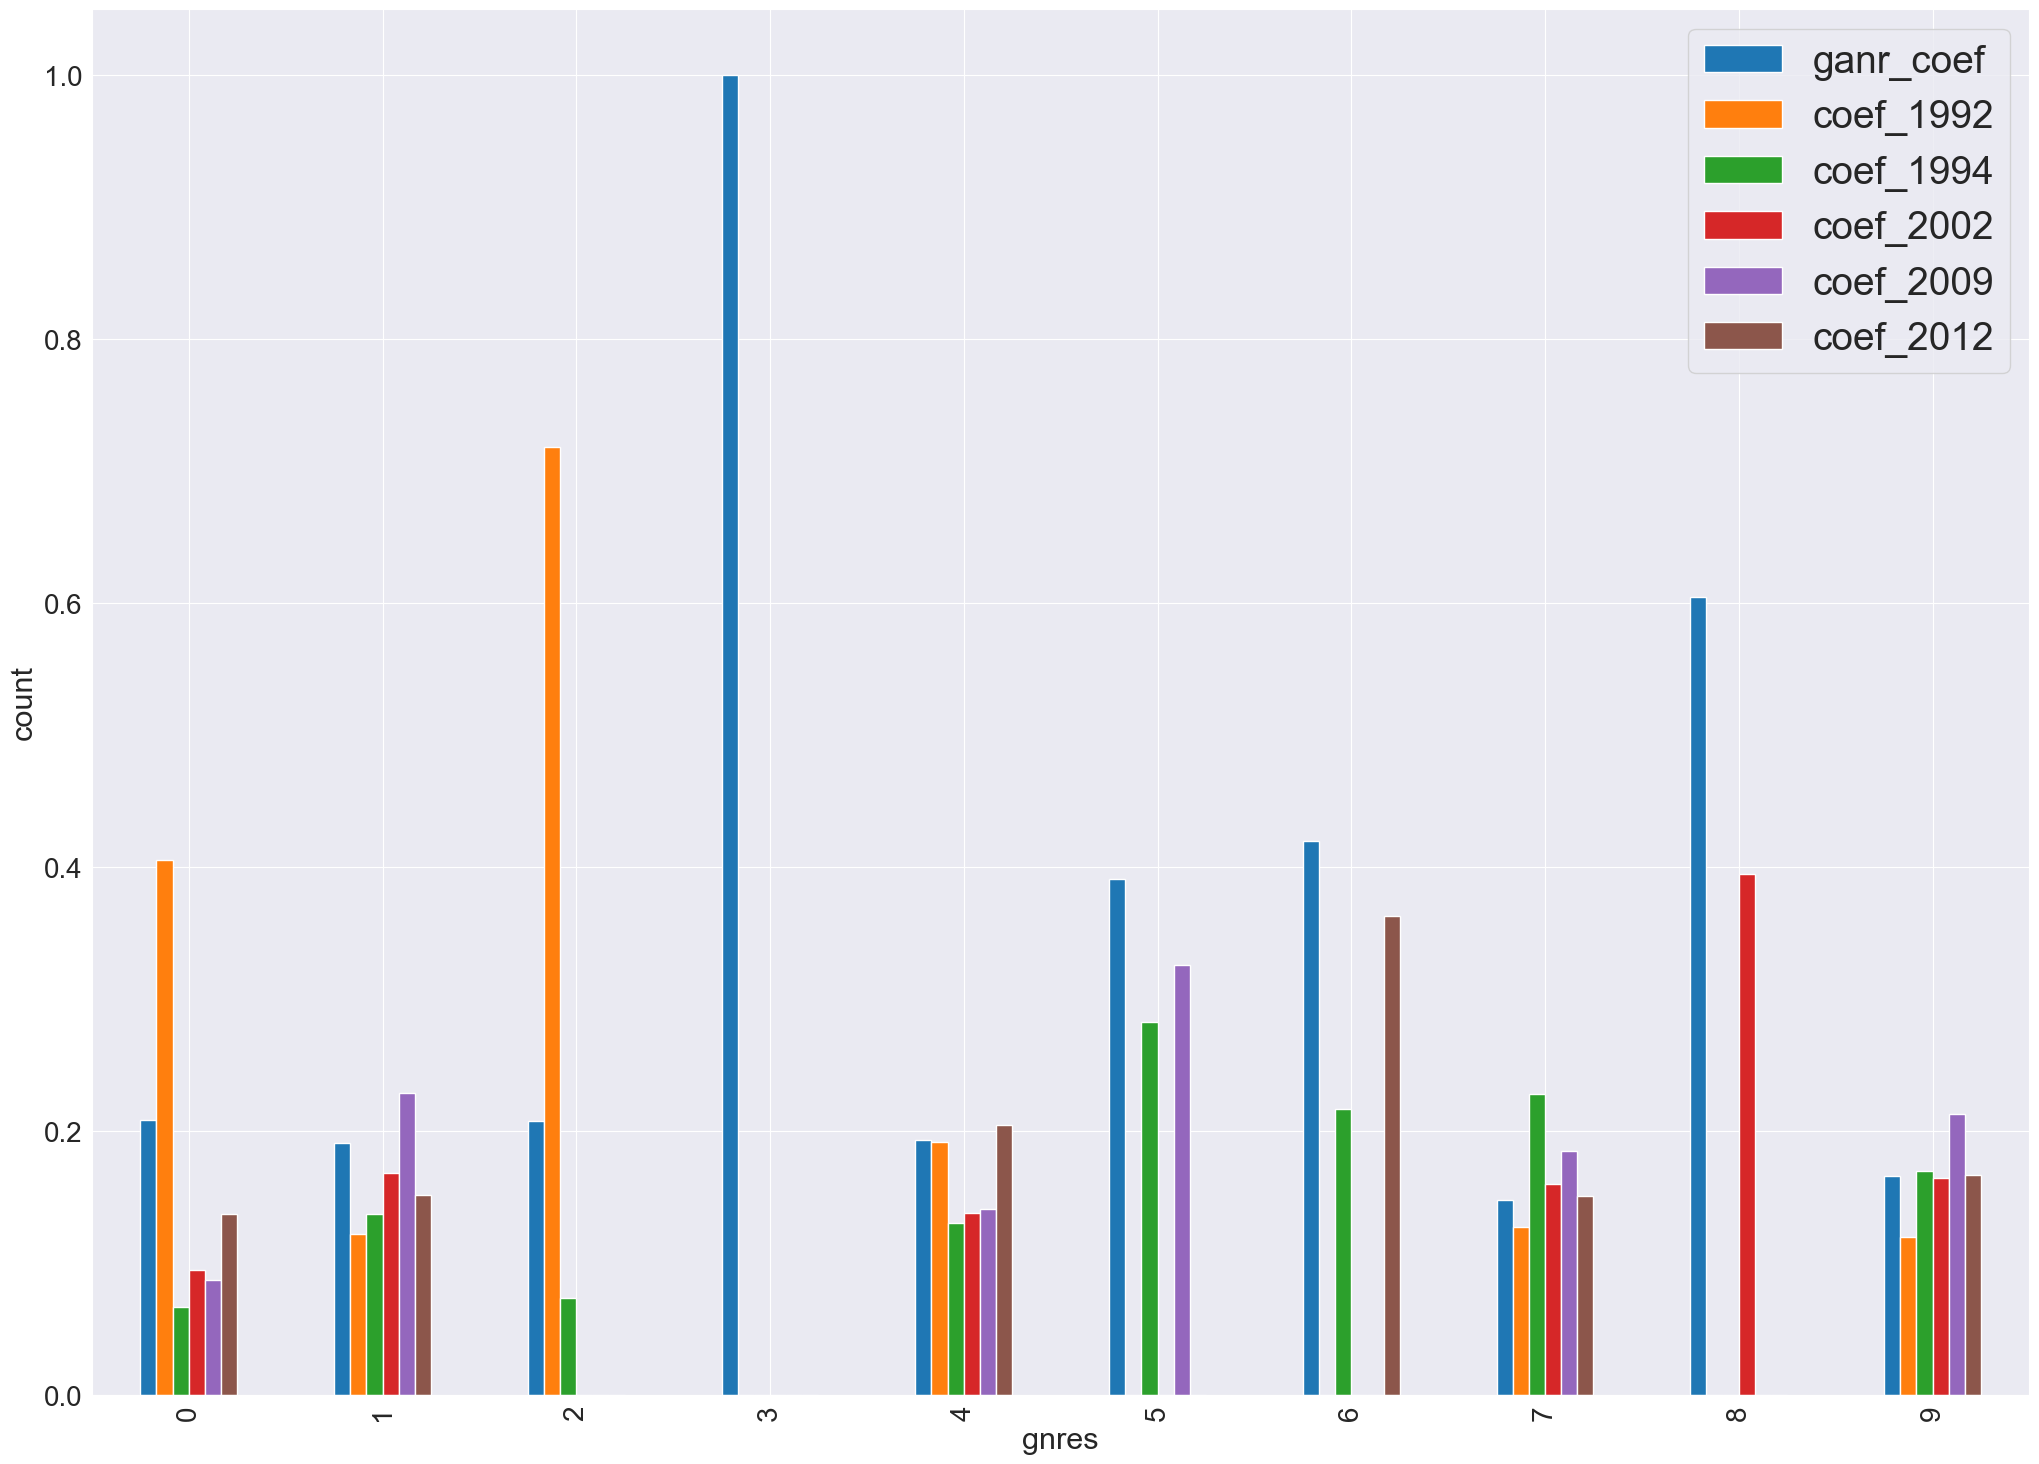

In [13]:
norm_ganr.plot(kind='bar', figsize=(25,18), fontsize=20)
plt.xlabel('gnres', fontsize=22)
plt.ylabel('count', fontsize=22)
plt.legend(norm_ganr, fontsize=28)

In [813]:
DF_Adventure['marga_coef'] = DF_Adventure['marga_coef'].apply(lambda x:  1 if x > 2.6 else 0)
DF_Adventure['imdb_score'] = DF_Adventure['imdb_score'].apply(lambda x: 1 if x > 5.5 else 0)

In [815]:
DF_Adventure['year_class'].value_counts(normalize=True)

1   0.833
0   0.167
Name: year_class, dtype: float64

In [814]:
DF_Fantasy['marga_coef'] = DF_Fantasy['marga_coef'].apply(lambda x:  1 if x > 2.6 else 0)
DF_Fantasy['imdb_score'] = DF_Fantasy['imdb_score'].apply(lambda x: 1 if x > 5.5 else 0)

In [816]:
DF_Fantasy['year_class'].value_counts(normalize=True)

1   0.745
0   0.255
Name: year_class, dtype: float64

# ************************

# Start of Catboost !

In [585]:
from catboost import CatBoostClassifier

In [951]:
#обучаем модель на датасете DF_Adventure

train, test = train_test_split(DF_Adventure,train_size=0.65,random_state=42,stratify=DF_Adventure['film_class'])

val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['film_class'])


In [1296]:
# 'title_year', , 'year_class' , 'film_class' 'movie_facebook_likes' ,'num_voted_users' 'good_film_summ' , 'marga_coef' 'director_name', 'actor_1_name',
X = ['title_year', 'gross', 'budget', 'marga', 'imdb_score', 'marga_coef',
     'director_name', 'actor_1_name',
     'movie_facebook_likes' ,'num_voted_users'
     ]

cat_features = ['director_name', 'actor_1_name']

y = ['film_class']


In [1297]:

from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                  )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                  )


In [1298]:

params = {'verbose': 100,
          'task_type': 'GPU',
          'random_seed': 42}


In [1299]:

cat_model = CatBoostClassifier(**params)


In [1300]:

cat_model.fit(train_data, eval_set=valid_data)


Learning rate set to 0.074582
0:	learn: 0.5710394	test: 0.5695644	best: 0.5695644 (0)	total: 61ms	remaining: 1m
100:	learn: 0.0133709	test: 0.0669236	best: 0.0669236 (100)	total: 3.87s	remaining: 34.4s
200:	learn: 0.0060085	test: 0.0630306	best: 0.0616782 (146)	total: 8.38s	remaining: 33.3s
300:	learn: 0.0038258	test: 0.0613872	best: 0.0611739 (297)	total: 12.1s	remaining: 28.1s
400:	learn: 0.0028292	test: 0.0614134	best: 0.0611739 (297)	total: 15.7s	remaining: 23.5s
500:	learn: 0.0022448	test: 0.0617096	best: 0.0610926 (450)	total: 19.5s	remaining: 19.4s
600:	learn: 0.0019103	test: 0.0613454	best: 0.0609039 (576)	total: 23.2s	remaining: 15.4s
700:	learn: 0.0016495	test: 0.0616182	best: 0.0609039 (576)	total: 26.9s	remaining: 11.5s
800:	learn: 0.0014495	test: 0.0615349	best: 0.0609039 (576)	total: 30.5s	remaining: 7.59s
900:	learn: 0.0012972	test: 0.0619590	best: 0.0609039 (576)	total: 34.2s	remaining: 3.76s
999:	learn: 0.0011845	test: 0.0617745	best: 0.0609039 (576)	total: 37.9s	remai

In [1301]:

pred = cat_model.predict(test[X])
print(classification_report(test[y], pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       130
           1       0.96      0.93      0.94        27

    accuracy                           0.98       157
   macro avg       0.97      0.96      0.97       157
weighted avg       0.98      0.98      0.98       157



In [1302]:
feature_importances = zip(train[X].columns, cat_model.feature_importances_)
list(feature_importances)

[('title_year', 2.631599690263428),
 ('gross', 3.998961835434233),
 ('budget', 15.47540676495588),
 ('marga', 25.460364817534202),
 ('imdb_score', 3.4789156580272644),
 ('marga_coef', 44.882974650905304),
 ('director_name', 0.7491812434688611),
 ('actor_1_name', 0.2009198537510872),
 ('movie_facebook_likes', 0.7281985333588095),
 ('num_voted_users', 2.3934769523009445)]

In [975]:
# тут уже помещаем другой датасет для того, чтобы модельб обученая на первом датасете, созала по нему предикт
pred_v2 = cat_model.predict(DF_Fantasy[X])
print(classification_report(DF_Fantasy[y], pred_v2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       467
           1       0.89      0.92      0.90       102

    accuracy                           0.96       569
   macro avg       0.93      0.95      0.94       569
weighted avg       0.97      0.96      0.97       569



In [976]:

feature_importances = zip(DF_Fantasy[X].columns, cat_model.feature_importances_)
list(feature_importances)


[('title_year', 2.643895220954889),
 ('gross', 6.447079379297015),
 ('budget', 35.90789973837388),
 ('marga', 51.2413801149632),
 ('imdb_score', 2.3894889504497154),
 ('director_name', 0.49540307506122155),
 ('actor_1_name', 0.0),
 ('movie_facebook_likes', 0.10888271699462443),
 ('num_voted_users', 0.765970803905444)]

далее выясняем скоры, при которых будем преобразовывать скоры в классы

In [838]:
DF_Fantasy['score_catboost'] = cat_model.predict_proba(DF_Fantasy[X])[:, 1] #DF_Fantasy


In [839]:

DF_Fantasy['film_class_catboost_thr_05'] = (DF_Fantasy['score_catboost'] > 0.5).astype(int)


In [840]:

f1_score(DF_Fantasy['film_class'], DF_Fantasy['film_class_catboost_thr_05'])


0.9117647058823528

In [841]:

thrs_DF_Fantasy = []
thrs_DF_Fantasy = [1] + list(DF_Fantasy['score_catboost'].unique())


In [842]:

cat_result = []
for thr in thrs_DF_Fantasy:
    DF_Fantasy['y_pred_score_catboost'] = (DF_Fantasy['score_catboost'] > thr) * 1
    cat_result.append((thr, f1_score(DF_Fantasy['film_class'], DF_Fantasy['y_pred_score_catboost'])))


In [843]:

t_DF_Fantasy = pd.DataFrame()


In [844]:

t_DF_Fantasy = pd.DataFrame(cat_result, columns=['thr', 'f1'])


In [846]:

t_DF_Fantasy[t_DF_Fantasy['f1'] == t_DF_Fantasy['f1'].max()]


,thr,f1
418,0.946,0.948


In [847]:

DF_Fantasy['y_pred_best_class_catboost'] = (DF_Fantasy['score_catboost'] > 0.946).astype(int)


In [848]:
f1_score(DF_Fantasy['film_class'], DF_Fantasy['y_pred_best_class_catboost'])


0.9484536082474228

In [849]:
f1_score(DF_Fantasy['film_class'], DF_Fantasy['film_class_catboost_thr_05'])

0.9117647058823528

In [850]:
DF_Fantasy['film_class'].value_counts(normalize=True)

0   0.821
1   0.179
Name: film_class, dtype: float64

In [851]:
DF_Fantasy['y_pred_best_class_catboost'].value_counts(normalize=True)

0   0.838
1   0.162
Name: y_pred_best_class_catboost, dtype: float64

In [852]:
DF_Fantasy['film_class_catboost_thr_05'].value_counts(normalize=True)

0   0.821
1   0.179
Name: film_class_catboost_thr_05, dtype: float64

# ROC

In [853]:
from catboost.utils import get_roc_curve

In [854]:
test_data = Pool(data=DF_Fantasy[X],
                 label=DF_Fantasy[y],
                 cat_features=cat_features
                 )

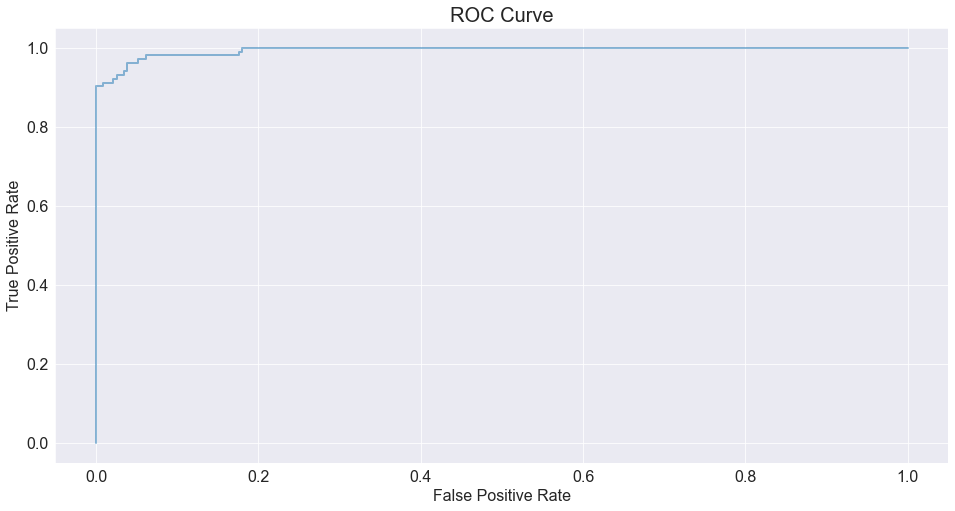

In [855]:

get_roc_curve(cat_model, test_data, plot=True);

In [856]:
print('ROC-AUC', round(roc_auc_score(DF_Fantasy['film_class'],DF_Fantasy['y_pred_best_class_catboost']),3))

ROC-AUC 0.951


In [857]:
roc_params = {'verbose': 100,
          'eval_metric': 'AUC',
          'random_seed': 42}

In [858]:
roc_model = CatBoostClassifier(**roc_params)

In [859]:
roc_model.fit(train_data, eval_set=valid_data)

Learning rate set to 0.0277
0:	test: 0.9384615	best: 0.9384615 (0)	total: 12.7ms	remaining: 12.7s
100:	test: 0.9902367	best: 0.9902367 (92)	total: 2.61s	remaining: 23.3s
200:	test: 0.9928994	best: 0.9928994 (131)	total: 4.91s	remaining: 19.5s
300:	test: 0.9934911	best: 0.9934911 (252)	total: 7.38s	remaining: 17.1s
400:	test: 0.9946746	best: 0.9946746 (375)	total: 9.61s	remaining: 14.4s
500:	test: 0.9949704	best: 0.9949704 (481)	total: 11.8s	remaining: 11.7s
600:	test: 0.9949704	best: 0.9952663 (586)	total: 13.9s	remaining: 9.21s
700:	test: 0.9949704	best: 0.9952663 (586)	total: 16.1s	remaining: 6.85s
800:	test: 0.9949704	best: 0.9952663 (586)	total: 18.3s	remaining: 4.56s
900:	test: 0.9949704	best: 0.9952663 (586)	total: 20.5s	remaining: 2.25s
999:	test: 0.9949704	best: 0.9952663 (586)	total: 22.8s	remaining: 0us

bestTest = 0.9952662722
bestIteration = 586

Shrink model to first 587 iterations.


In [860]:
roc_pred = roc_model.predict(DF_Fantasy[X])
print(classification_report(DF_Fantasy[y], roc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       467
           1       0.88      0.94      0.91       102

    accuracy                           0.97       569
   macro avg       0.93      0.96      0.94       569
weighted avg       0.97      0.97      0.97       569



In [861]:
DF_Fantasy['score_catboost_roc_model'] = roc_model.predict_proba(DF_Fantasy[X])[:,1]

In [862]:
thrs_roc = []

In [863]:

thrs_roc = [1] + list(DF_Fantasy['score_catboost_roc_model'].unique())

In [864]:

roc_result = []
for thr in thrs_roc:
    DF_Fantasy['y_pred_score_catboost_roc_model'] = (DF_Fantasy['score_catboost_roc_model'] > thr) * 1
    roc_result.append((thr,
                   f1_score(DF_Fantasy['film_class'], DF_Fantasy['y_pred_score_catboost_roc_model'])))


In [865]:

catboost_roc_model = pd.DataFrame()

In [866]:
catboost_roc_model = pd.DataFrame(roc_result, columns=['thr', 'f1'])

In [867]:

catboost_roc_model[catboost_roc_model['f1'] == catboost_roc_model['f1'].max()]

,thr,f1
514,0.621,0.925


In [868]:
DF_Fantasy['y_clas_catboost_roc_model'] = (DF_Fantasy['score_catboost_roc_model'] > 0.621).astype(int)

In [869]:

f1_score(DF_Fantasy['film_class'], DF_Fantasy['y_clas_catboost_roc_model'])

0.9253731343283583

In [870]:
DF_Fantasy['y_clas_catboost_roc_model'].value_counts(normalize=True)

0   0.826
1   0.174
Name: y_clas_catboost_roc_model, dtype: float64

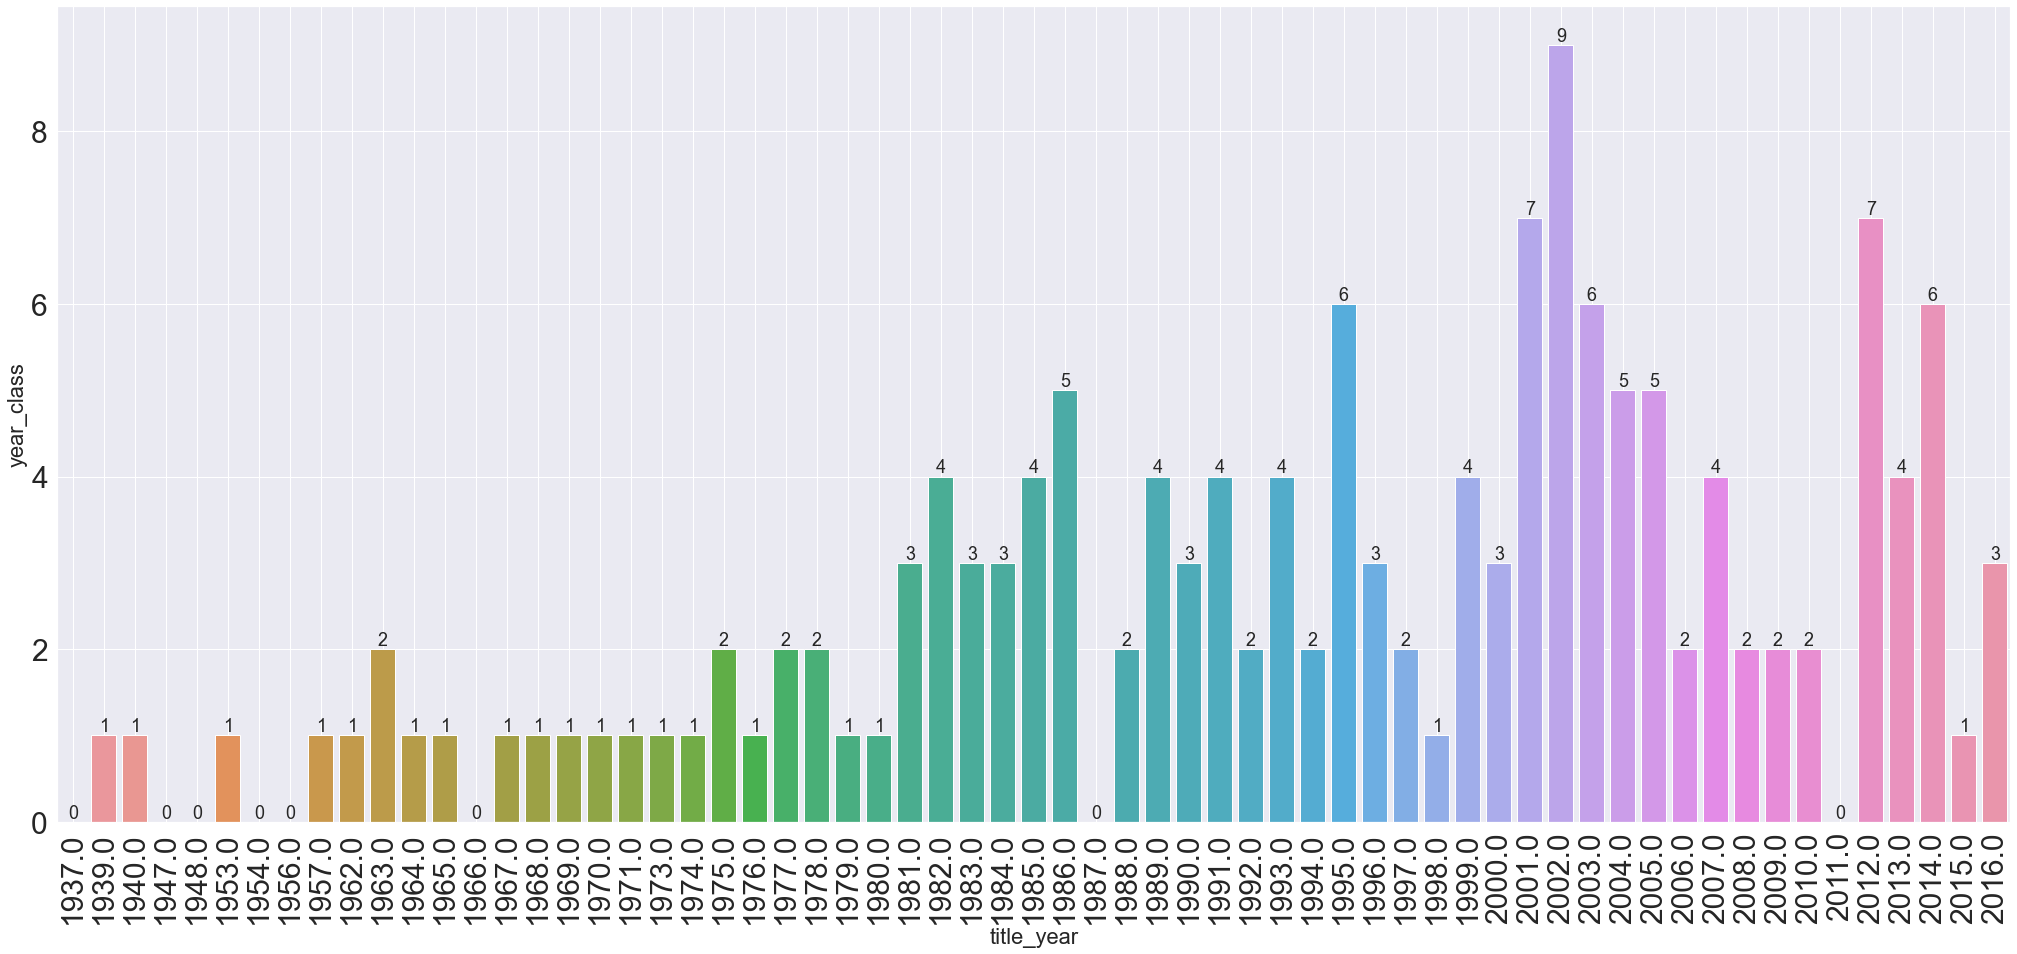

In [1291]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='good_film_summ', data=DF_Adventure)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

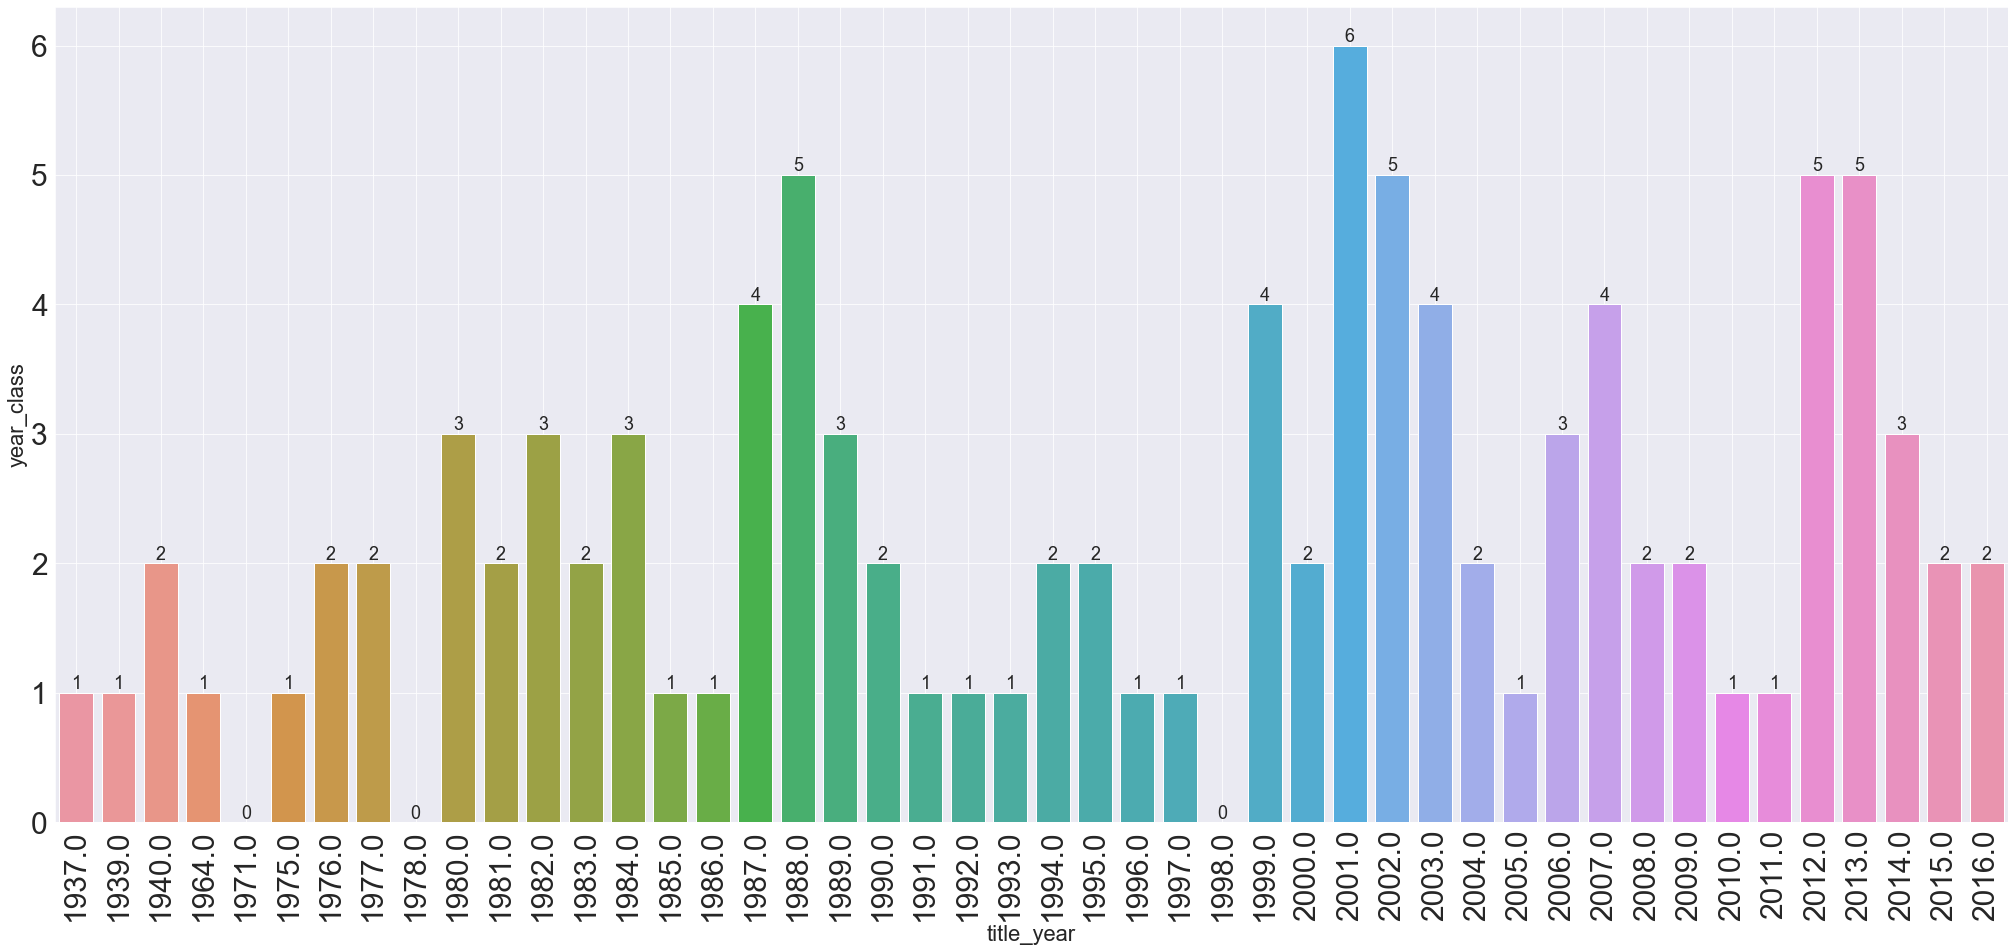

In [871]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='good_film_summ', data=DF_Fantasy)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

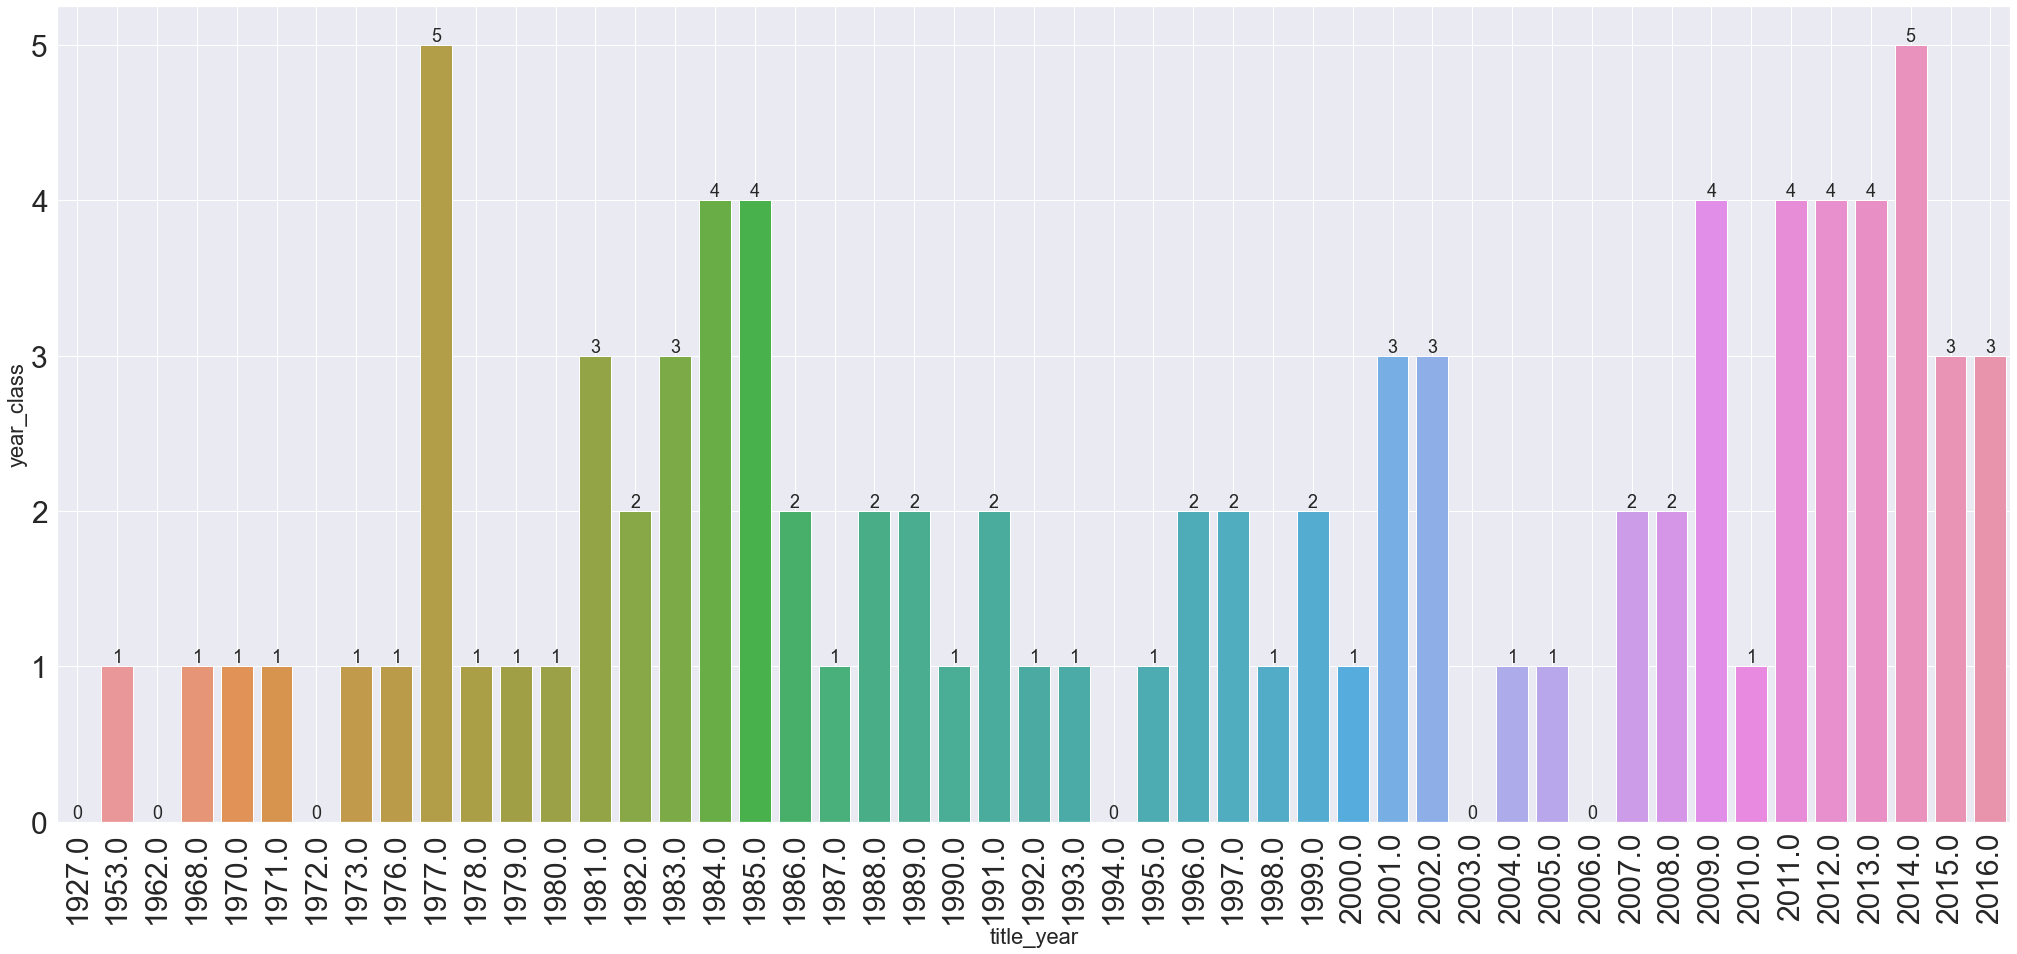

In [1077]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='good_film_summ', data=DF_Sci_Fi)
plt.grid(True)

chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)

plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

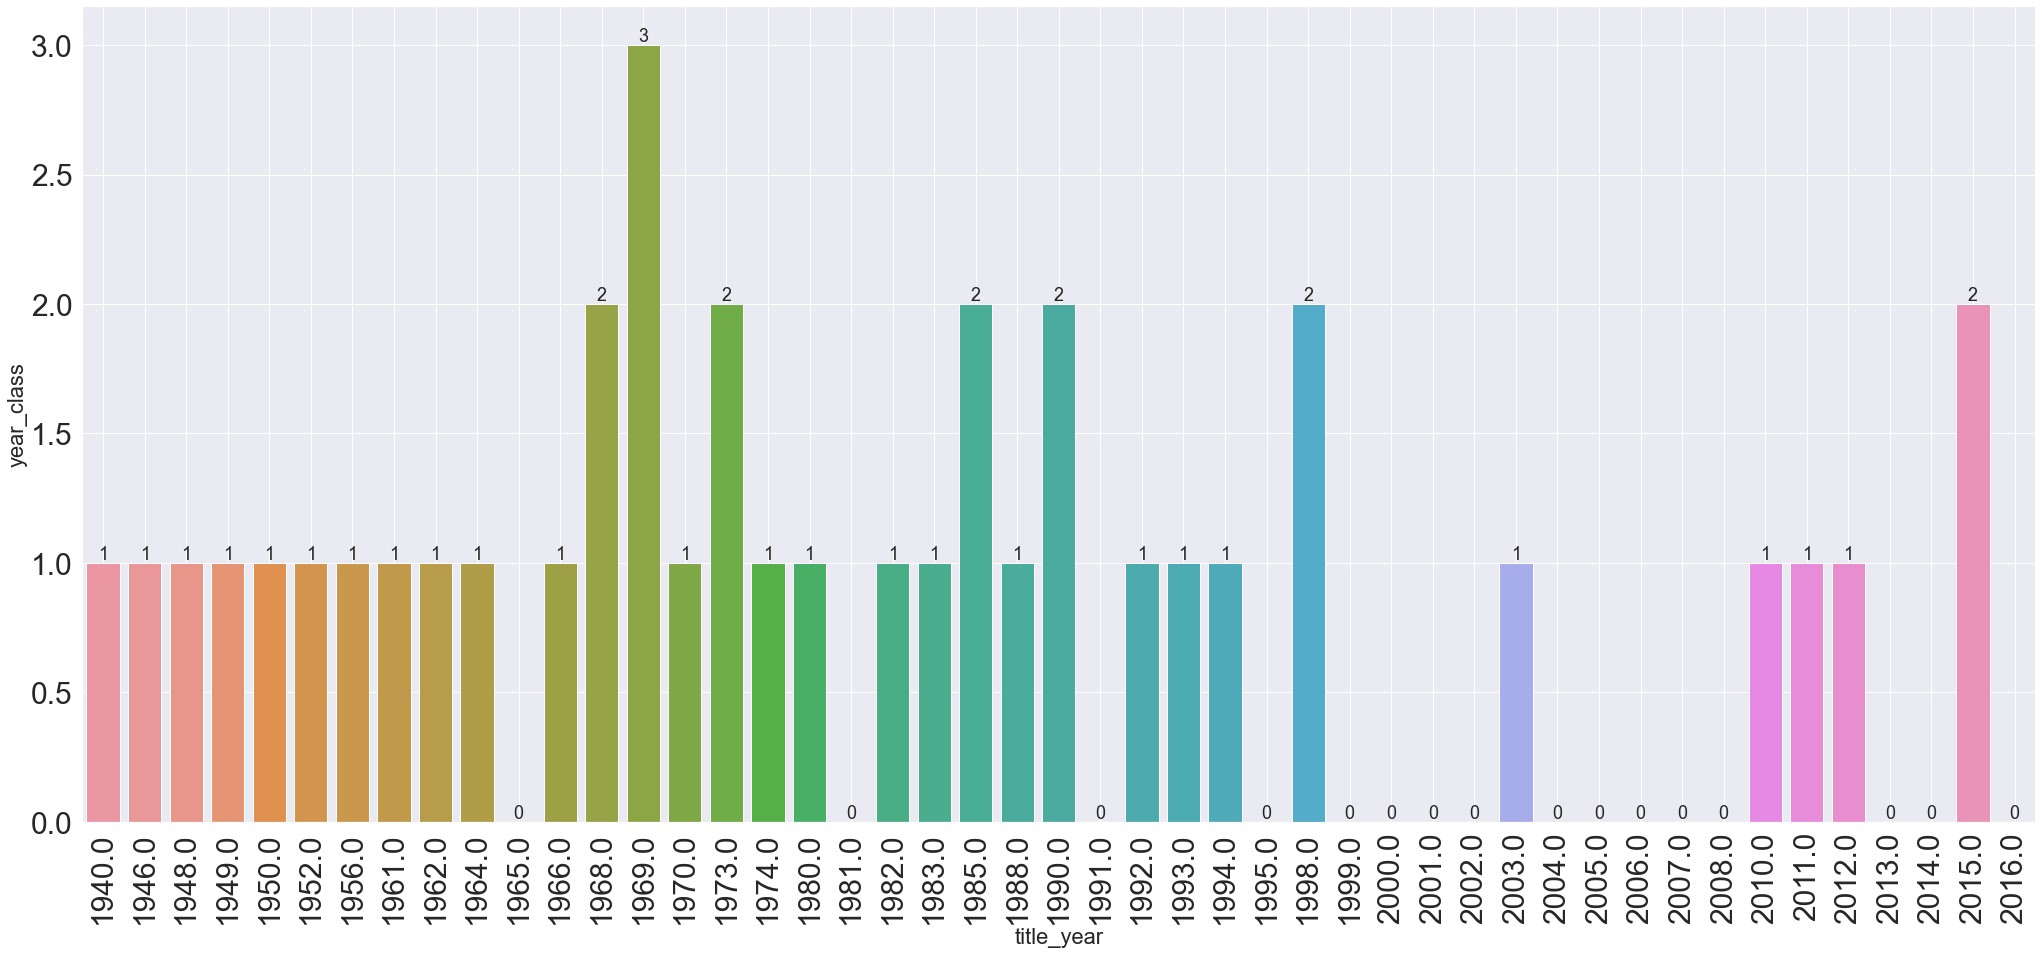

In [1279]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='good_film_summ', data=DF_Western)
plt.grid(True)

chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)

plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [879]:

film_class_sum_cat = DF_Fantasy.reset_index().groupby('title_year')['y_clas_catboost_roc_model'].agg(['sum'])
DF_Fantasy = pd.merge(DF_Fantasy, film_class_sum_cat, how='left', on='title_year')
DF_Fantasy.rename(columns={'sum': 'good_film_summ_catboost_roc'}, inplace=True)

DF_Fantasy['year_class_catboost_roc'] = (DF_Fantasy['good_film_summ_catboost_roc'] > 1).astype(int)

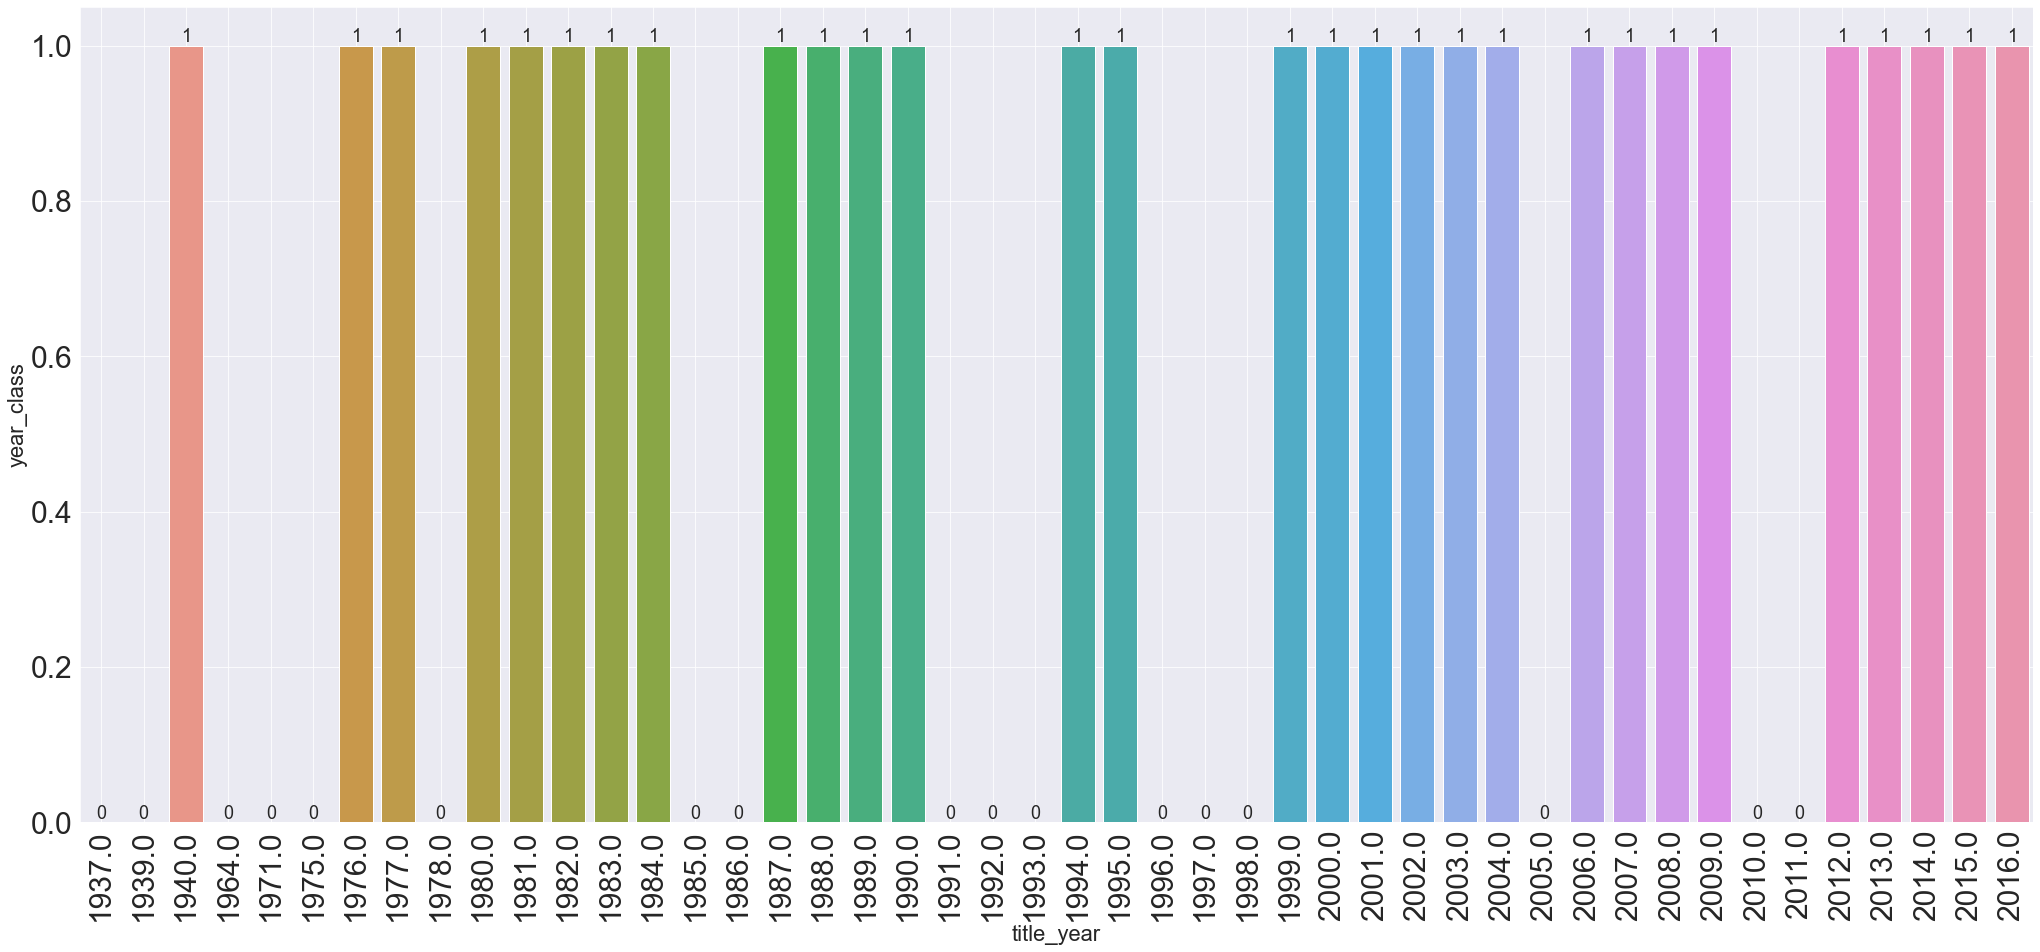

In [880]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class', data=DF_Fantasy)
plt.grid(True)

chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)

plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

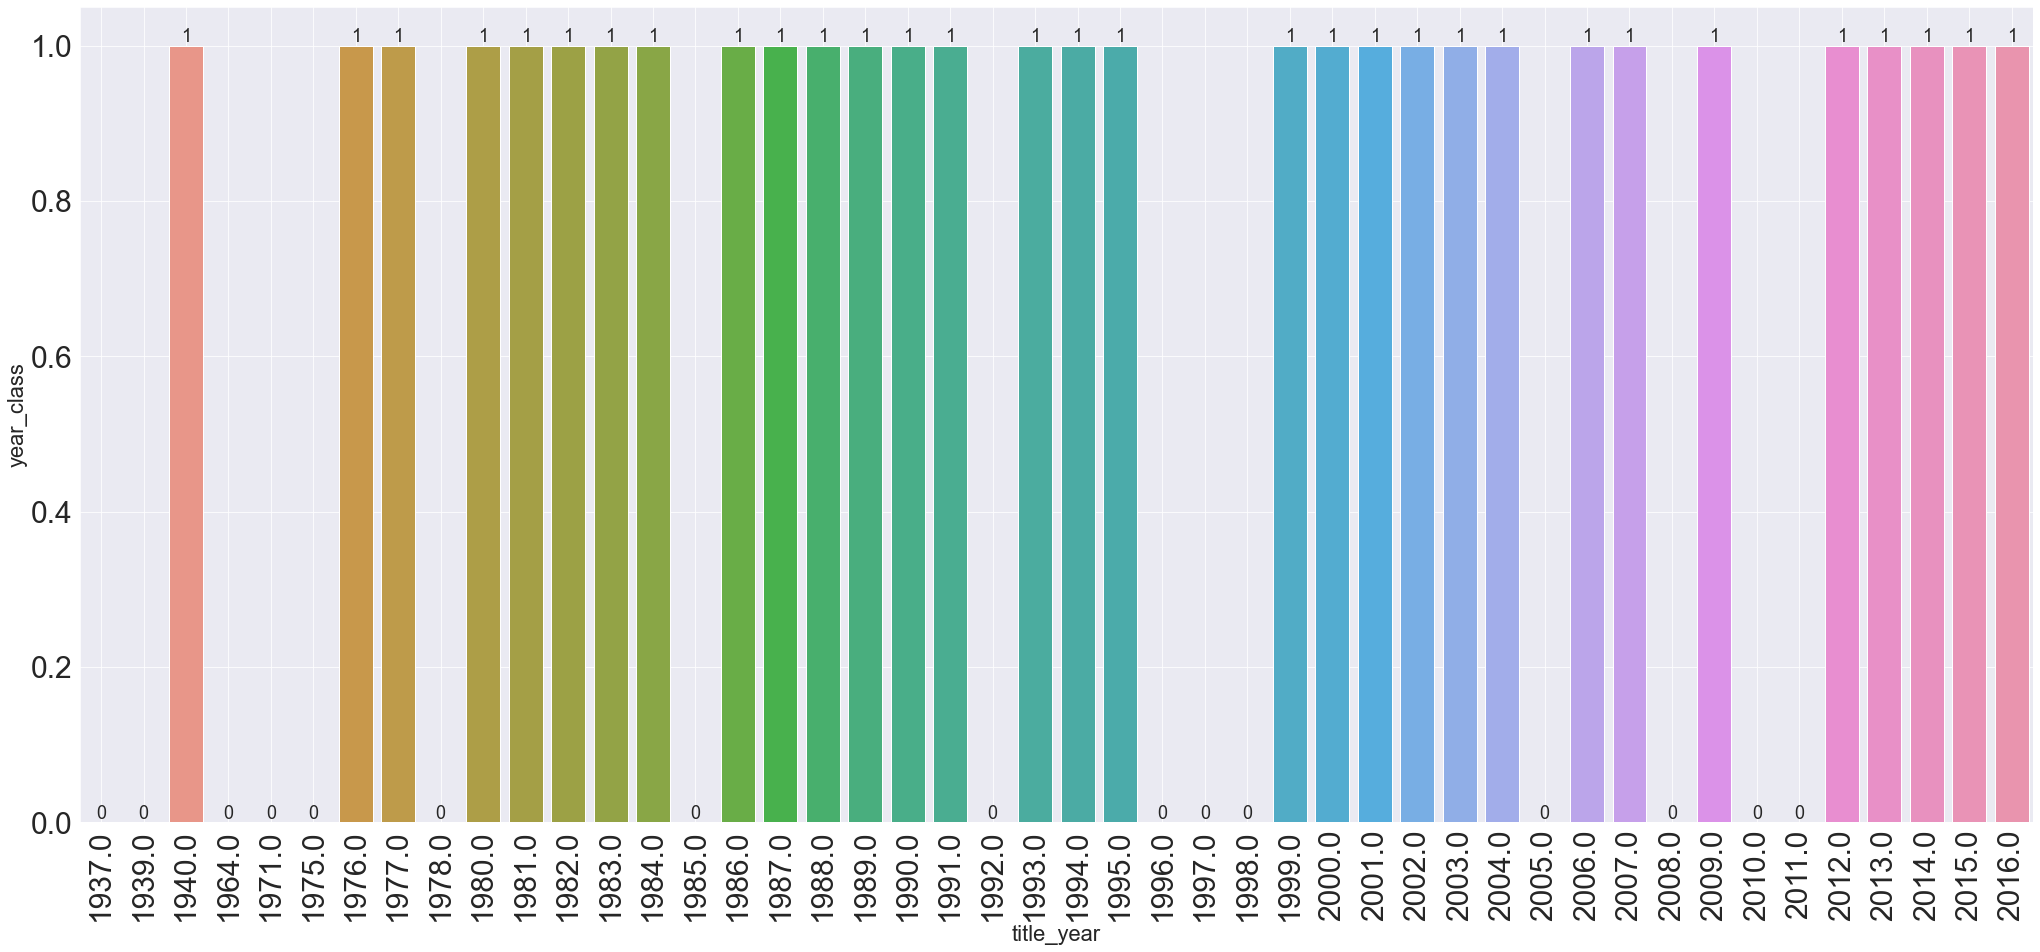

In [881]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_thr_05', data=DF_Fantasy)
plt.grid(True)

chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)

plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

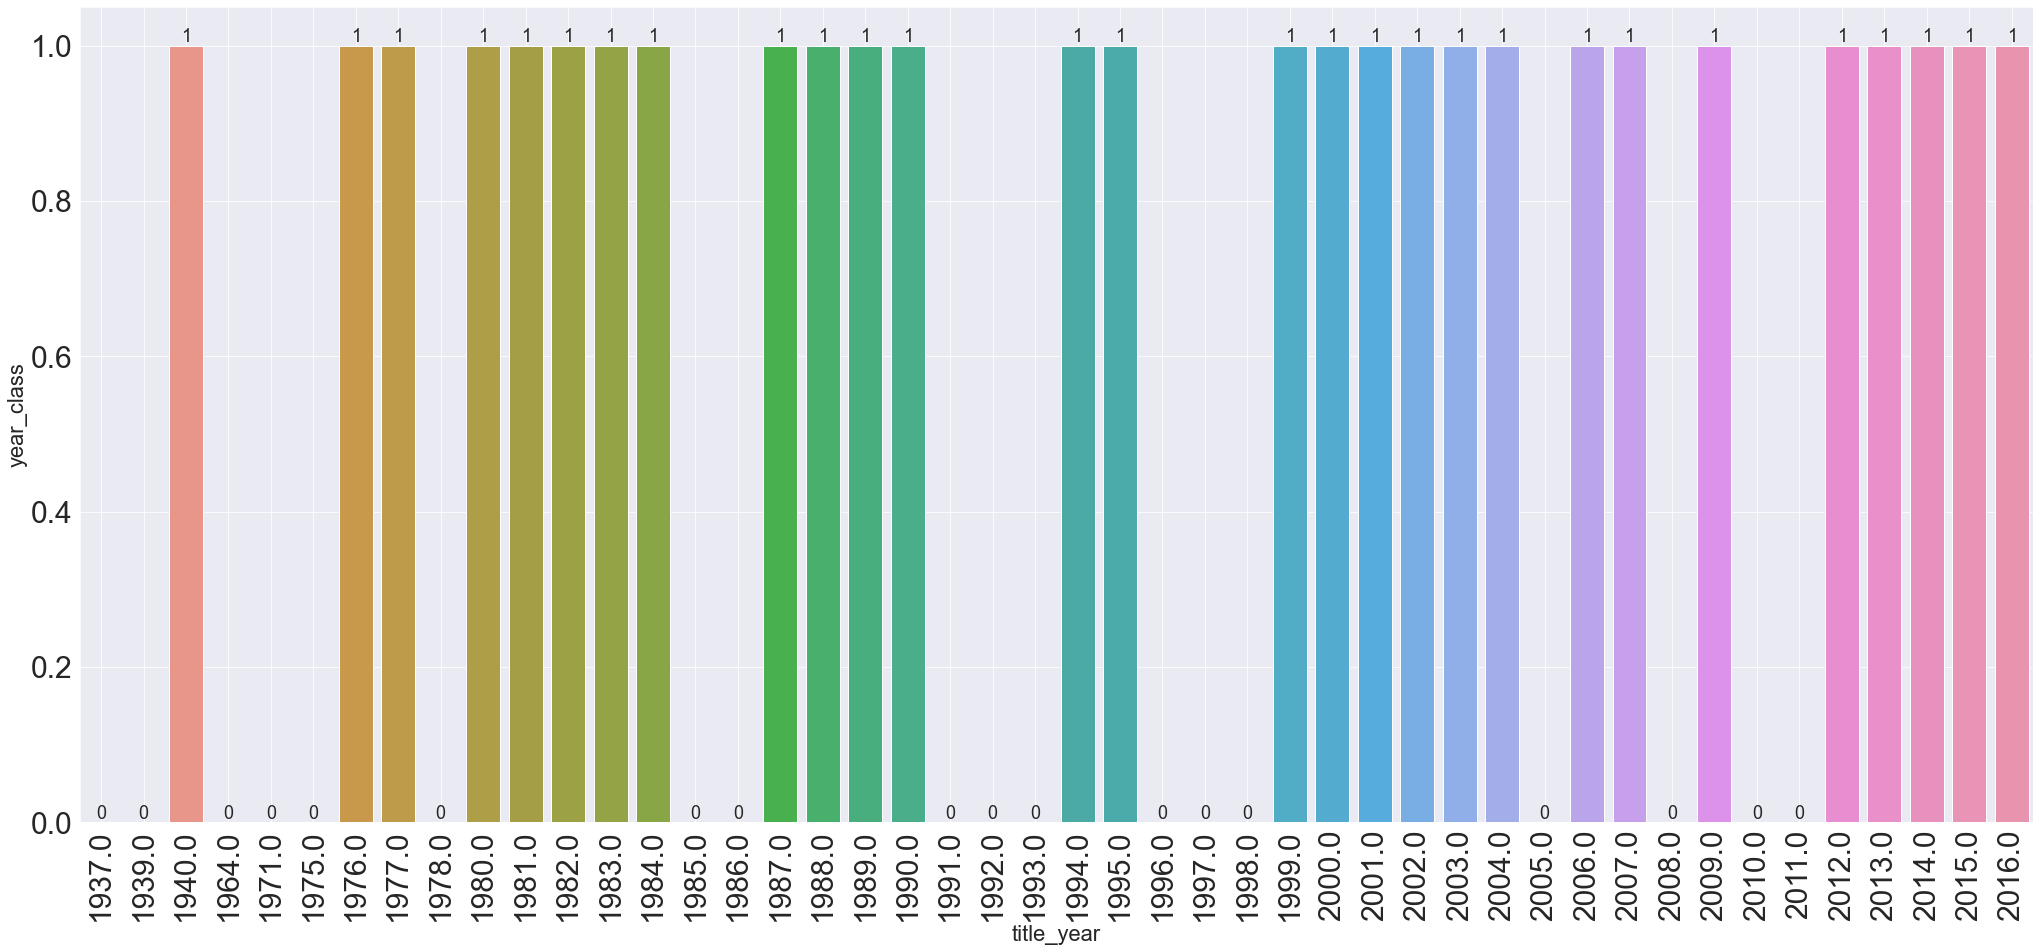

In [884]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_best_class_catboost', data=DF_Fantasy)
plt.grid(True)

chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

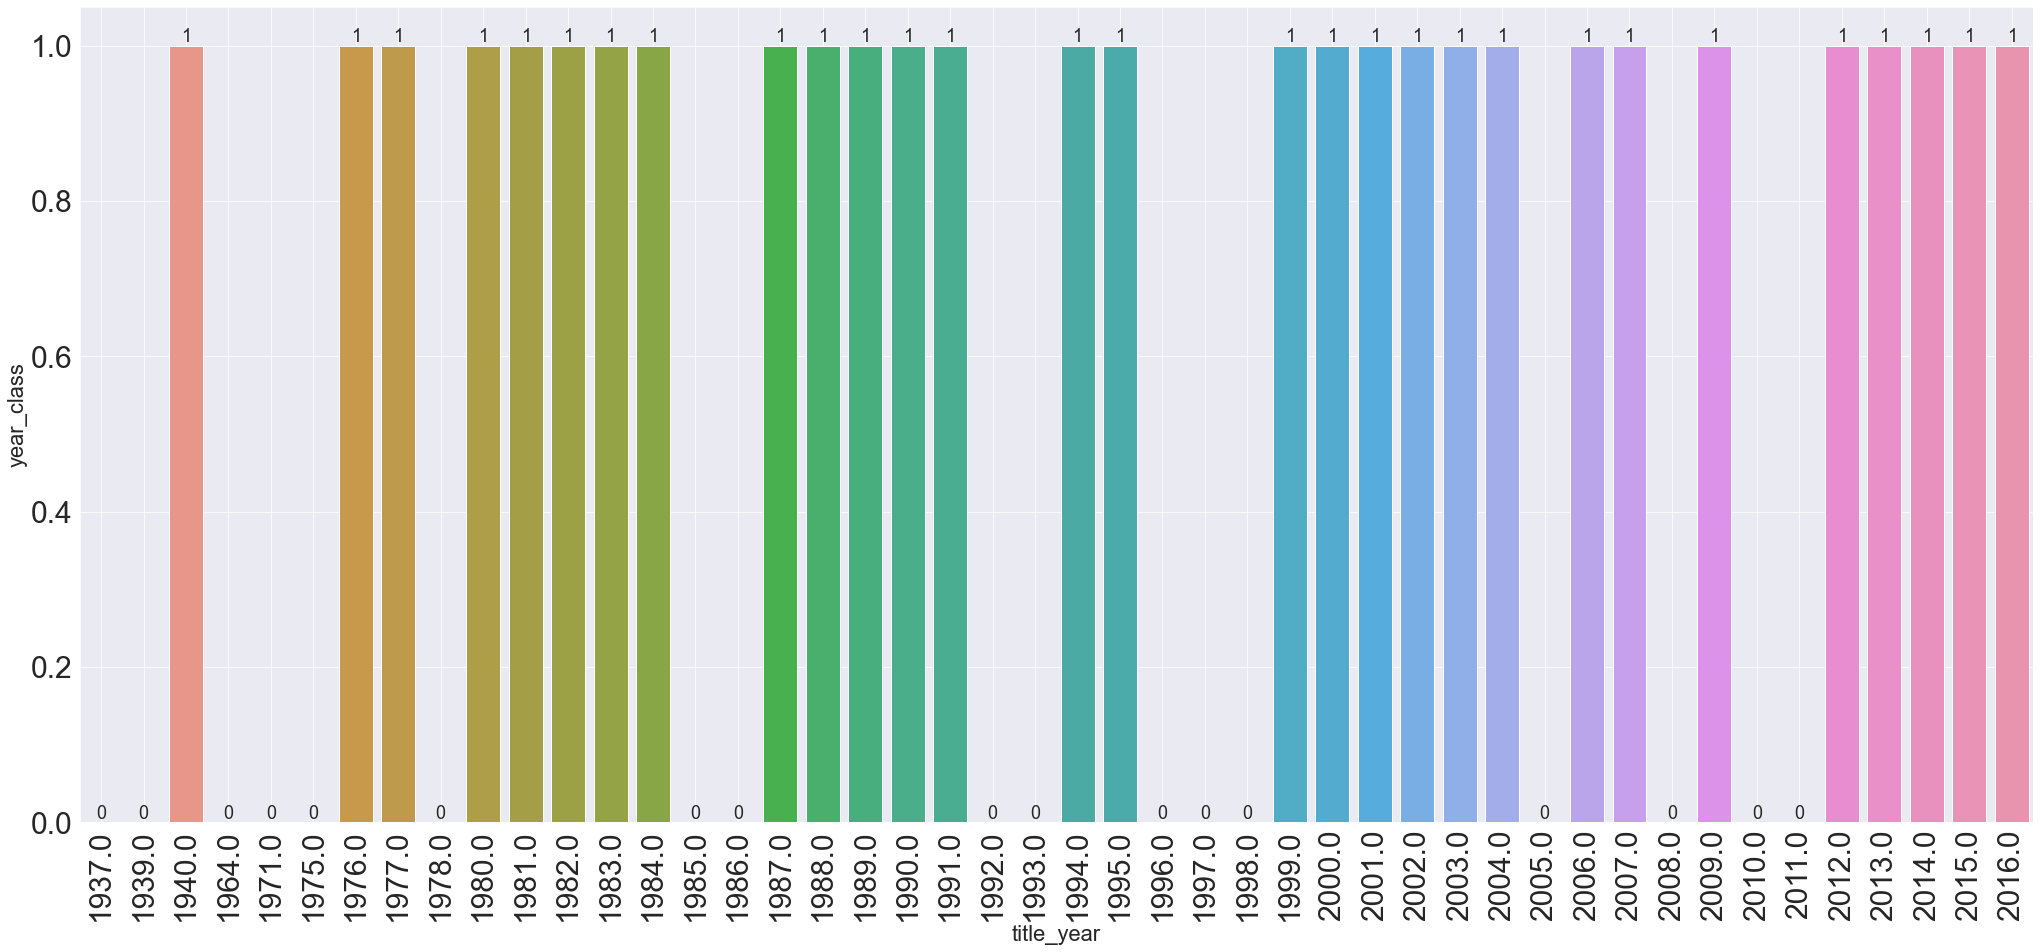

In [885]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_roc', data=DF_Fantasy)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

# тут проделаем всё то же с датасетом по фантастике. модель уже обучена

In [889]:
DF_Sci_Fi['marga_coef'] = DF_Sci_Fi['marga_coef'].apply(lambda x:  1 if x > 2.6 else 0)
DF_Sci_Fi['imdb_score'] = DF_Sci_Fi['imdb_score'].apply(lambda x: 1 if x > 5.5 else 0)

In [890]:
pred_v3 = cat_model.predict(DF_Sci_Fi[X])
print(classification_report(DF_Sci_Fi[y], pred_v3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       468
           1       0.96      0.93      0.94        91

    accuracy                           0.98       559
   macro avg       0.97      0.96      0.97       559
weighted avg       0.98      0.98      0.98       559



In [891]:

feature_importances_DF_Sci_Fi = zip(DF_Sci_Fi[X].columns, cat_model.feature_importances_)
list(feature_importances_DF_Sci_Fi)


[('title_year', 1.52968540508254),
 ('gross', 4.7009788263035475),
 ('budget', 15.343935464644806),
 ('marga', 25.438257455483832),
 ('marga_coef', 45.91444199822168),
 ('imdb_score', 3.9518444680199845),
 ('director_name', 0.7591299512302709),
 ('actor_1_name', 0.10869183280025055),
 ('movie_facebook_likes', 0.5810817422070047),
 ('num_voted_users', 1.6719528560061085)]

In [892]:
DF_Sci_Fi['score_catboost'] = cat_model.predict_proba(DF_Sci_Fi[X])[:, 1]

In [893]:

DF_Sci_Fi['film_class_catboost_thr_05'] = (DF_Sci_Fi['score_catboost'] > 0.5).astype(int)

In [894]:

f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['film_class_catboost_thr_05'])


0.9444444444444444

In [895]:

thrs_DF_Sci_Fi = []
thrs_DF_Sci_Fi = [1] + list(DF_Sci_Fi['score_catboost'].unique())


In [896]:

cat_result = []
for thr in thrs_DF_Sci_Fi:
    DF_Sci_Fi['y_pred_score_catboost'] = (DF_Sci_Fi['score_catboost'] > thr) * 1
    cat_result.append((thr, f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['y_pred_score_catboost'])))


In [897]:

t_DF_Sci_Fi = pd.DataFrame()

In [898]:

t_DF_Sci_Fi = pd.DataFrame(cat_result, columns=['thr', 'f1'])

In [899]:

t_DF_Sci_Fi[t_DF_Sci_Fi['f1'] == t_DF_Sci_Fi['f1'].max()]

,thr,f1
212,0.387,0.950


In [900]:
DF_Sci_Fi['y_pred_best_class_catboost'] = (DF_Sci_Fi['score_catboost'] > 0.387).astype(int)

In [901]:

f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['y_pred_best_class_catboost'])

0.945054945054945

In [902]:

f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['film_class_catboost_thr_05'])

0.9444444444444444

In [903]:
DF_Sci_Fi['film_class'].value_counts(normalize=True)

0   0.837
1   0.163
Name: film_class, dtype: float64

In [904]:

DF_Sci_Fi['y_pred_best_class_catboost'].value_counts(normalize=True)

0   0.837
1   0.163
Name: y_pred_best_class_catboost, dtype: float64

In [905]:

DF_Sci_Fi['film_class_catboost_thr_05'].value_counts(normalize=True)

0   0.841
1   0.159
Name: film_class_catboost_thr_05, dtype: float64

# ROC

In [906]:
test_data = Pool(data=DF_Sci_Fi[X],
                 label=DF_Sci_Fi[y],
                 cat_features=cat_features
                 )

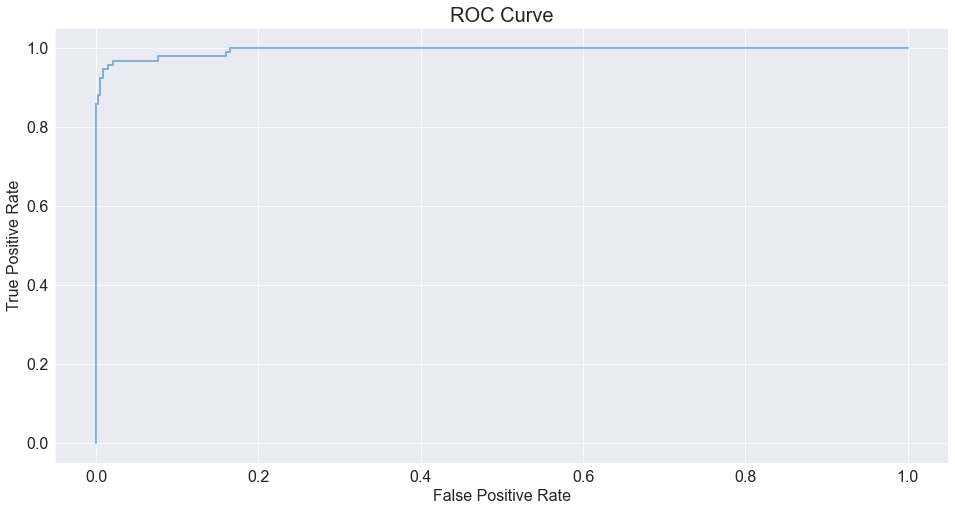

In [907]:

get_roc_curve(cat_model, test_data, plot=True);

In [908]:
print('ROC-AUC', round(roc_auc_score(DF_Sci_Fi['film_class'],DF_Sci_Fi['y_pred_best_class_catboost']),3))

ROC-AUC 0.967


In [909]:
roc_params = {'verbose': 100,
              'eval_metric': 'AUC',
              'random_seed': 42}

In [910]:
roc_model.fit(train_data, eval_set=valid_data)

Learning rate set to 0.0277
0:	test: 0.9384615	best: 0.9384615 (0)	total: 9.76ms	remaining: 9.75s
100:	test: 0.9902367	best: 0.9902367 (92)	total: 2.46s	remaining: 21.9s
200:	test: 0.9928994	best: 0.9928994 (131)	total: 4.95s	remaining: 19.7s
300:	test: 0.9934911	best: 0.9934911 (252)	total: 7.1s	remaining: 16.5s
400:	test: 0.9946746	best: 0.9946746 (375)	total: 9.32s	remaining: 13.9s
500:	test: 0.9949704	best: 0.9949704 (481)	total: 11.7s	remaining: 11.6s
600:	test: 0.9949704	best: 0.9952663 (586)	total: 13.7s	remaining: 9.12s
700:	test: 0.9949704	best: 0.9952663 (586)	total: 15.9s	remaining: 6.79s
800:	test: 0.9949704	best: 0.9952663 (586)	total: 18.1s	remaining: 4.49s
900:	test: 0.9949704	best: 0.9952663 (586)	total: 20.1s	remaining: 2.21s
999:	test: 0.9949704	best: 0.9952663 (586)	total: 22.1s	remaining: 0us

bestTest = 0.9952662722
bestIteration = 586

Shrink model to first 587 iterations.


In [911]:
roc_pred = roc_model.predict(DF_Sci_Fi[X])
print(classification_report(DF_Sci_Fi[y], roc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       468
           1       0.96      0.96      0.96        91

    accuracy                           0.99       559
   macro avg       0.97      0.97      0.97       559
weighted avg       0.99      0.99      0.99       559



In [912]:
DF_Sci_Fi['score_catboost_roc_model'] = roc_model.predict_proba(DF_Sci_Fi[X])[:, 1]

In [913]:

thrs_roc = []

In [914]:

thrs_roc = [1] + list(DF_Sci_Fi['score_catboost_roc_model'].unique())

In [915]:
roc_result = []
for thr in thrs_roc:
    DF_Sci_Fi['y_pred_score_catboost_roc_model'] = (DF_Sci_Fi['score_catboost_roc_model'] > thr) * 1
    roc_result.append((thr,
                       f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['y_pred_score_catboost_roc_model'])))


In [916]:
catboost_roc_model = pd.DataFrame()

In [917]:

catboost_roc_model = pd.DataFrame(roc_result, columns=['thr', 'f1'])

In [918]:

catboost_roc_model[catboost_roc_model['f1'] == catboost_roc_model['f1'].max()]

,thr,f1
356,0.560,0.961


In [919]:
DF_Sci_Fi['y_clas_catboost_roc_model'] = (DF_Sci_Fi['score_catboost_roc_model'] > 0.56).astype(int)

In [920]:
f1_score(DF_Sci_Fi['film_class'], DF_Sci_Fi['y_clas_catboost_roc_model'])

0.9560439560439561

In [921]:

DF_Sci_Fi['y_clas_catboost_roc_model'].value_counts(normalize=True)

0   0.837
1   0.163
Name: y_clas_catboost_roc_model, dtype: float64

In [935]:
DF_Sci_Fi = DF_Sci_Fi.drop('good_film_summ_catboost_best_class', axis=1)

In [941]:

film_class_sum_cat = DF_Sci_Fi.reset_index().groupby('title_year')['y_clas_catboost_roc_model'].agg(['sum'])
DF_Sci_Fi = pd.merge(DF_Sci_Fi, film_class_sum_cat, how='left', on='title_year')
DF_Sci_Fi.rename(columns={'sum': 'good_film_summ_catboost_roc_model'}, inplace=True)

In [938]:

DF_Sci_Fi['year_class_catboost_thr_05'] = (DF_Sci_Fi['good_film_summ_catboost_thr_05'] > 1).astype(int)

In [940]:
DF_Sci_Fi['year_class_catboost_best'] = (DF_Sci_Fi['good_film_summ_catboost_best_class'] > 1).astype(int)

In [942]:
DF_Sci_Fi['year_class_catboost_roc_model'] = (DF_Sci_Fi['good_film_summ_catboost_roc_model'] > 1).astype(int)

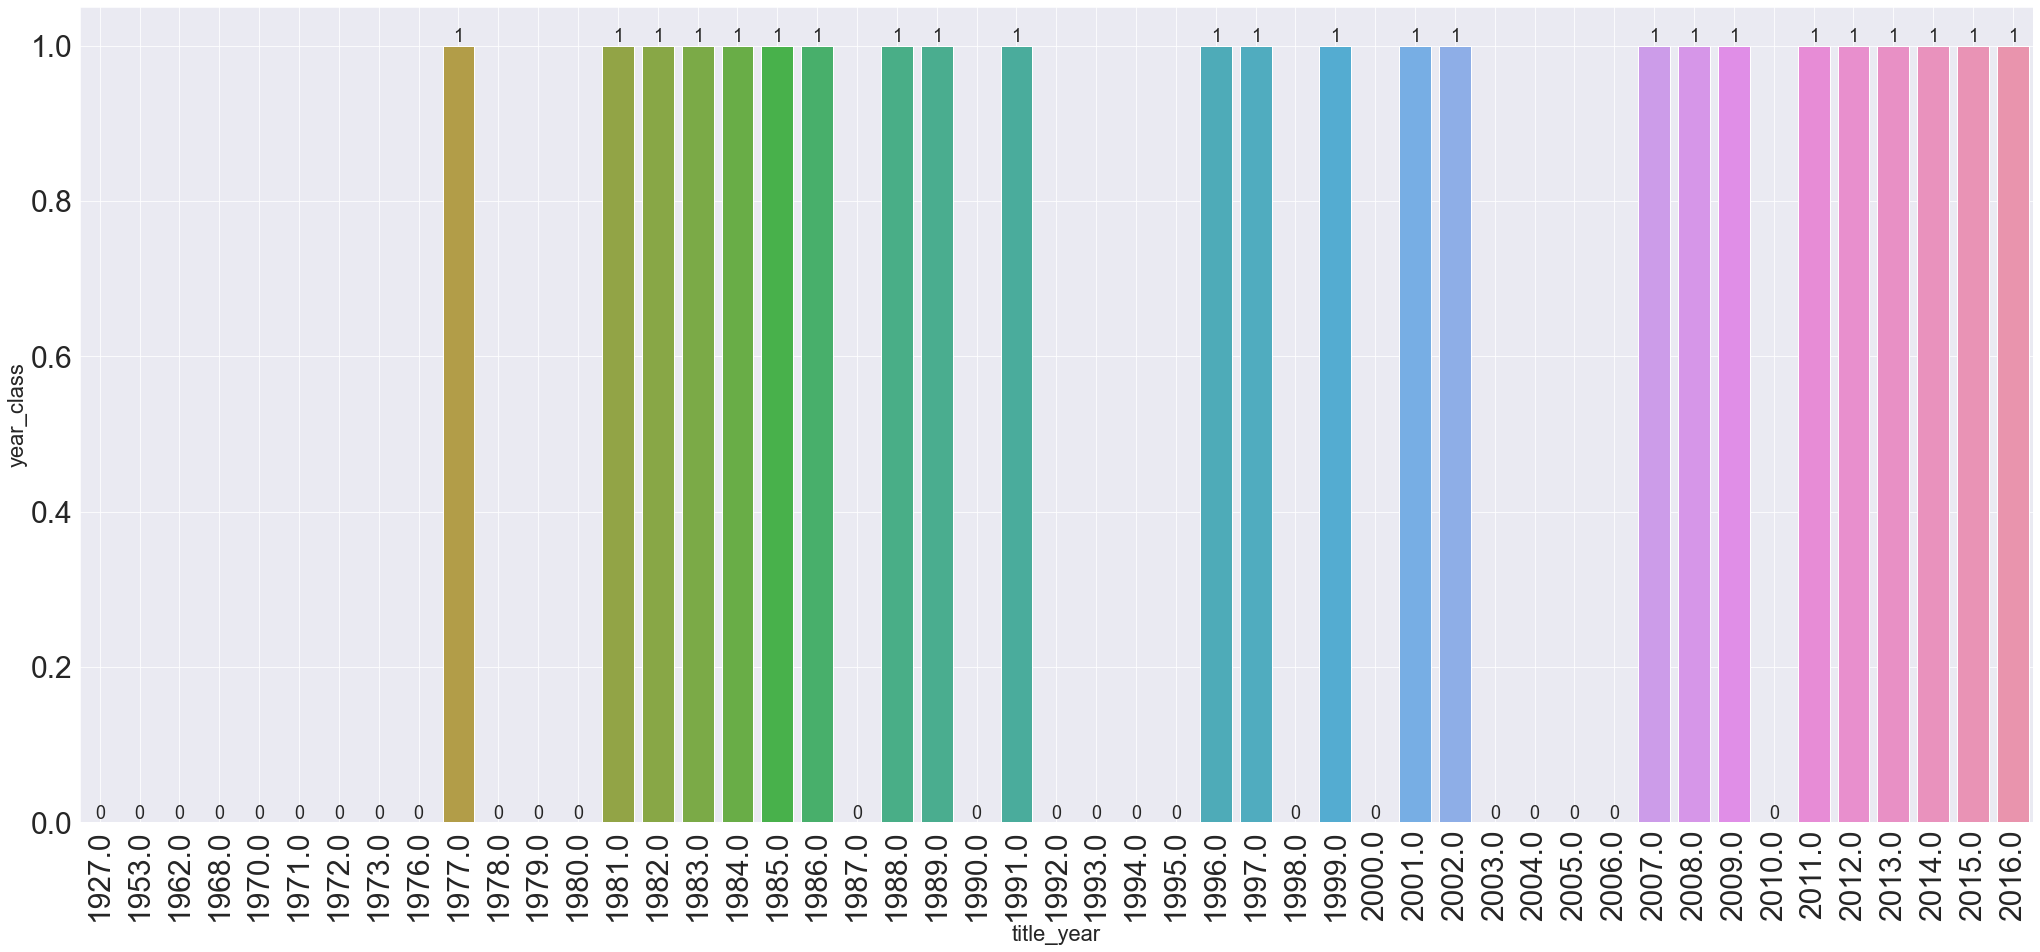

In [943]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class', data=DF_Sci_Fi)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

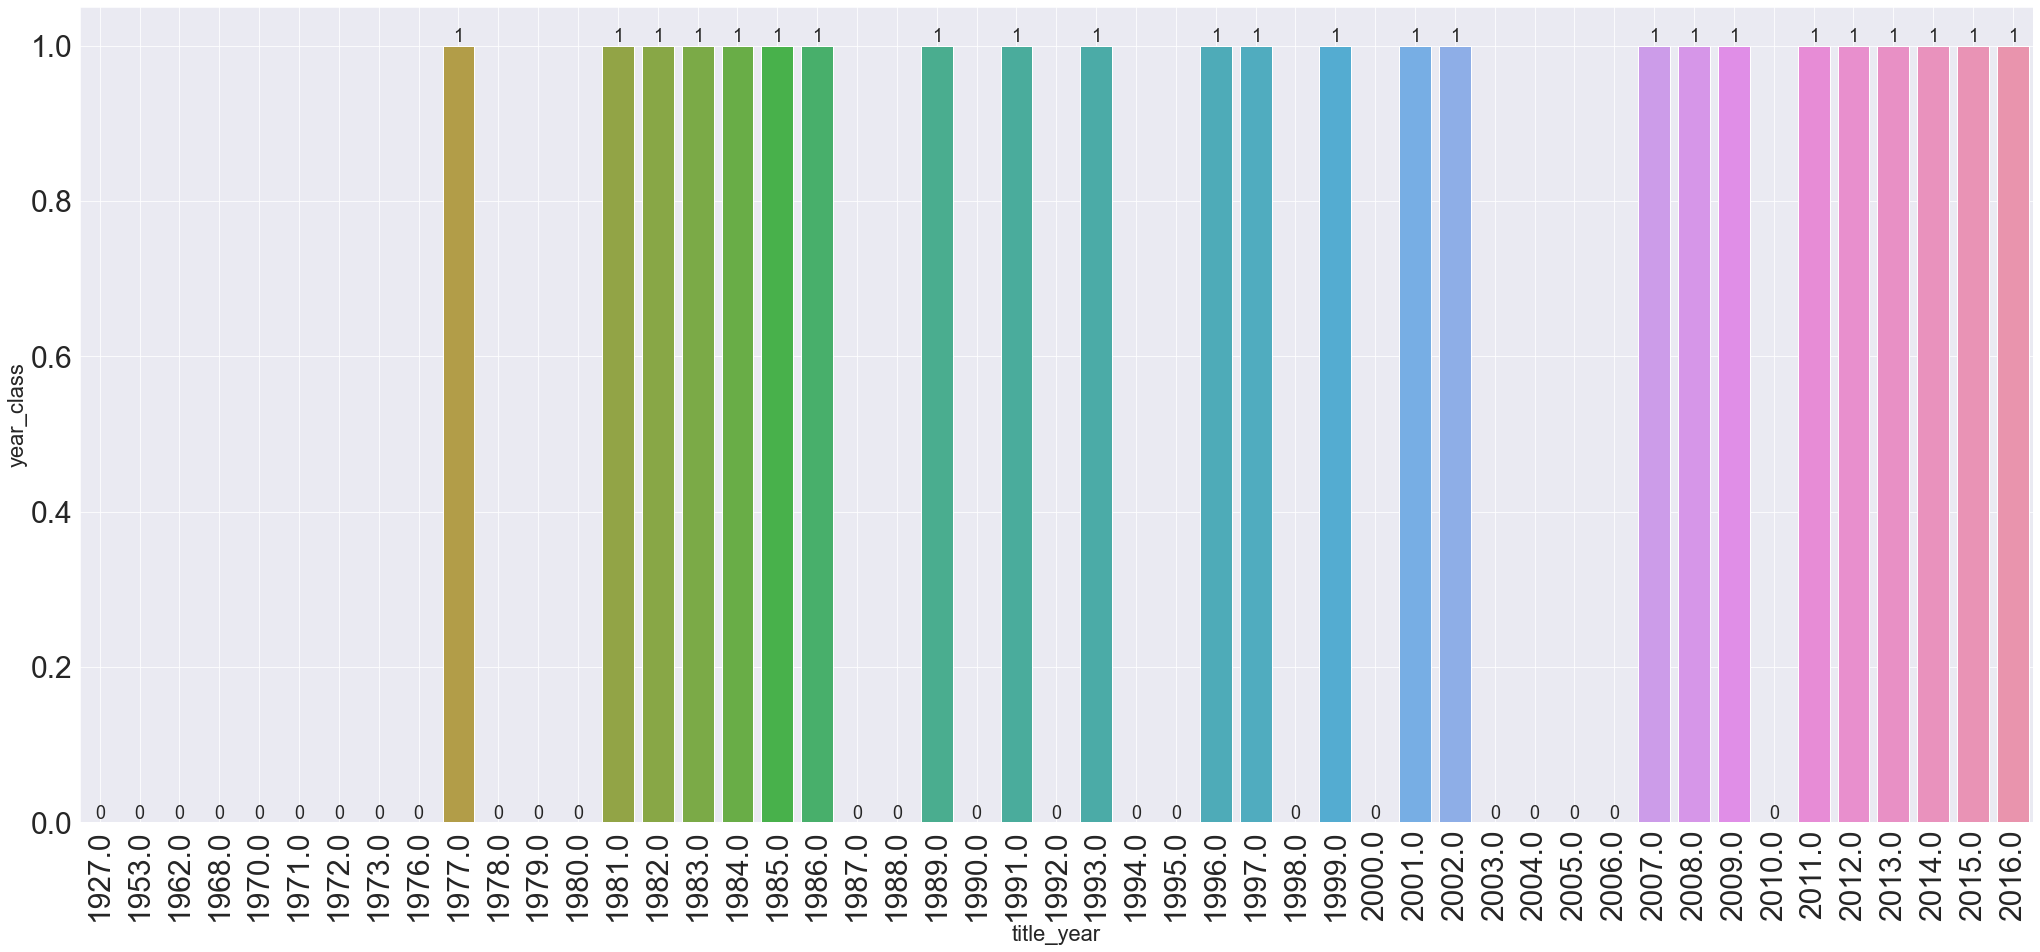

In [944]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_thr_05', data=DF_Sci_Fi)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

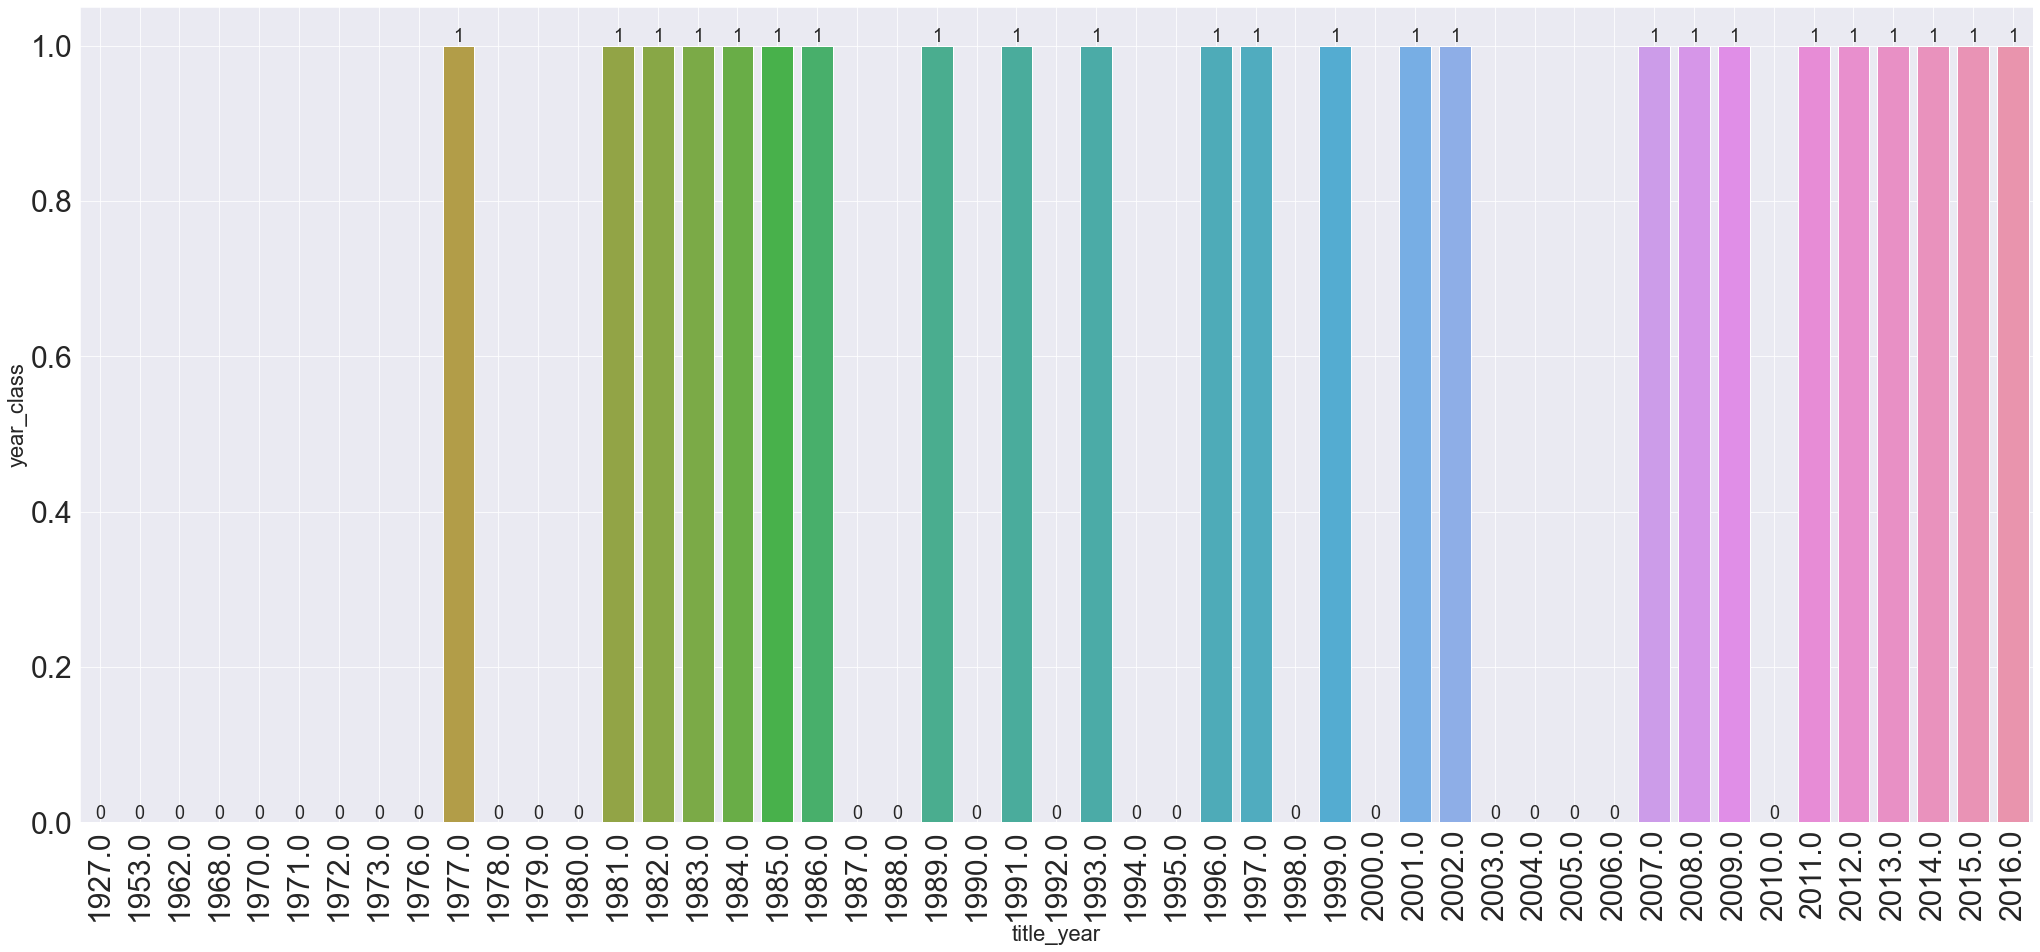

In [945]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_best', data=DF_Sci_Fi)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

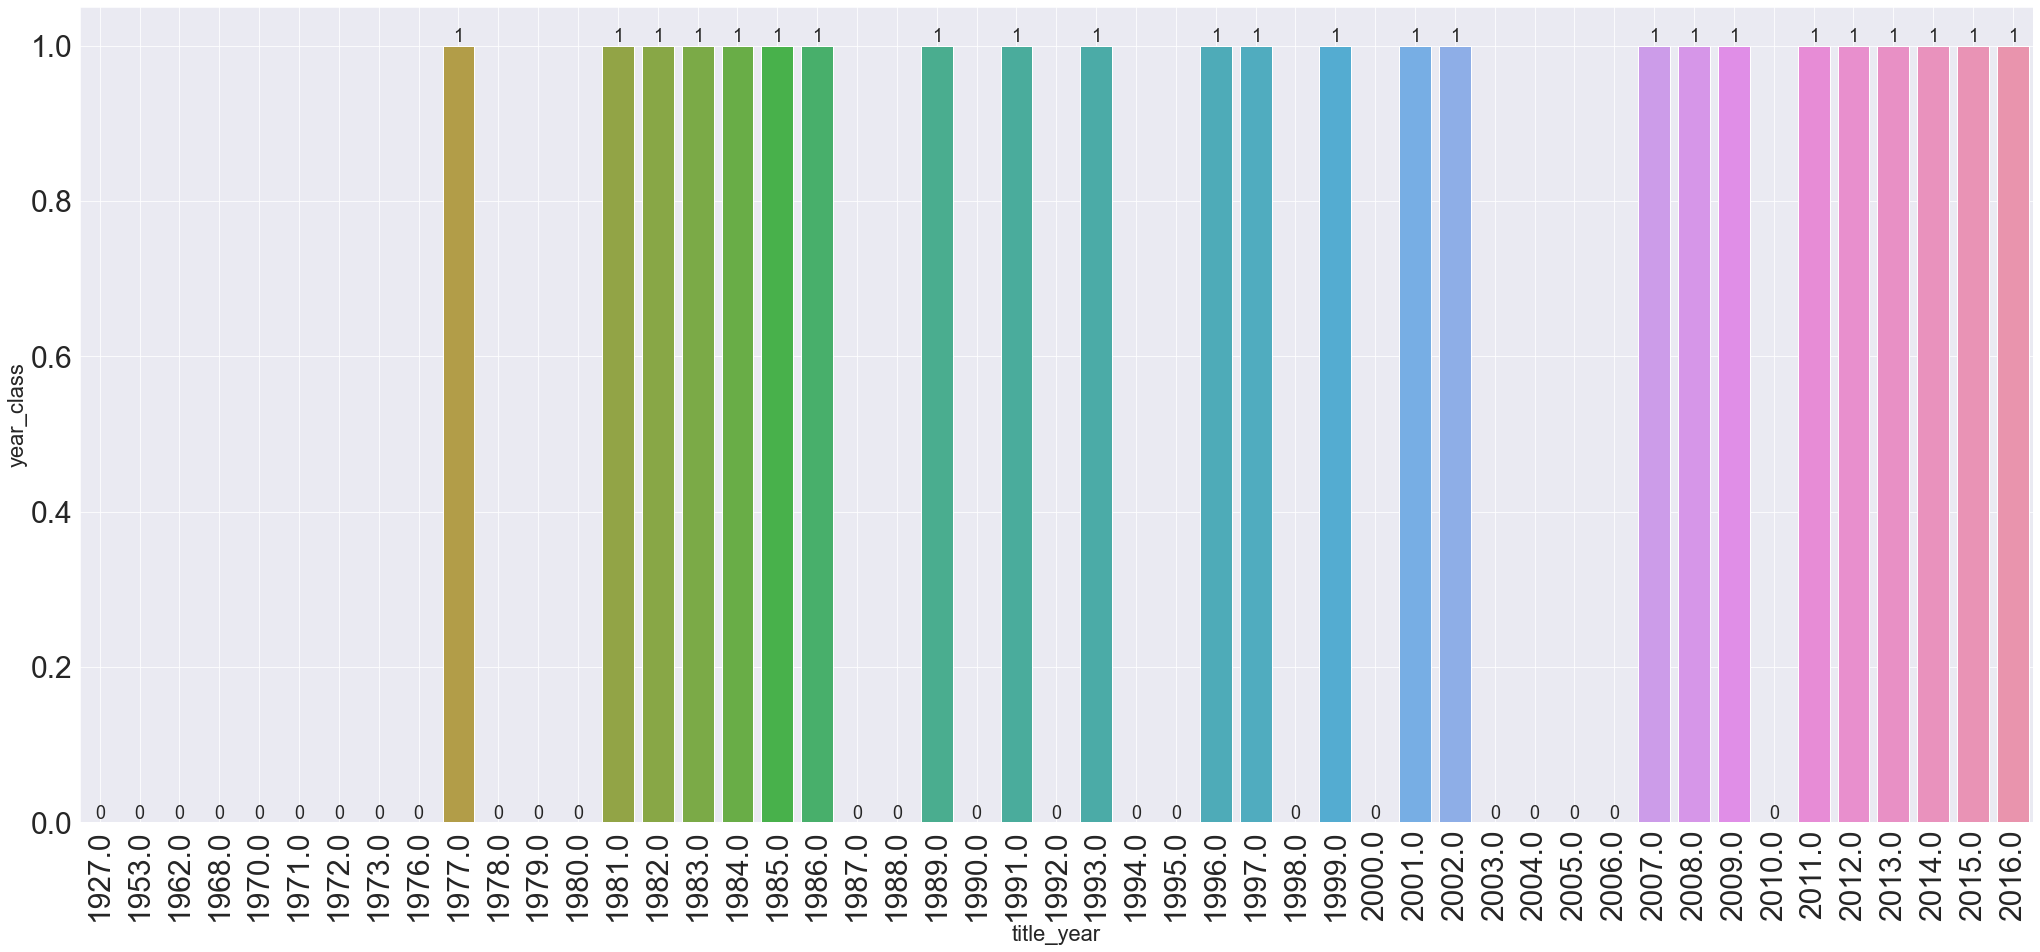

In [946]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_roc_model', data=DF_Sci_Fi)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [1017]:
sns.set(rc={'figure.figsize': (27, 13), 'figure.': 72})


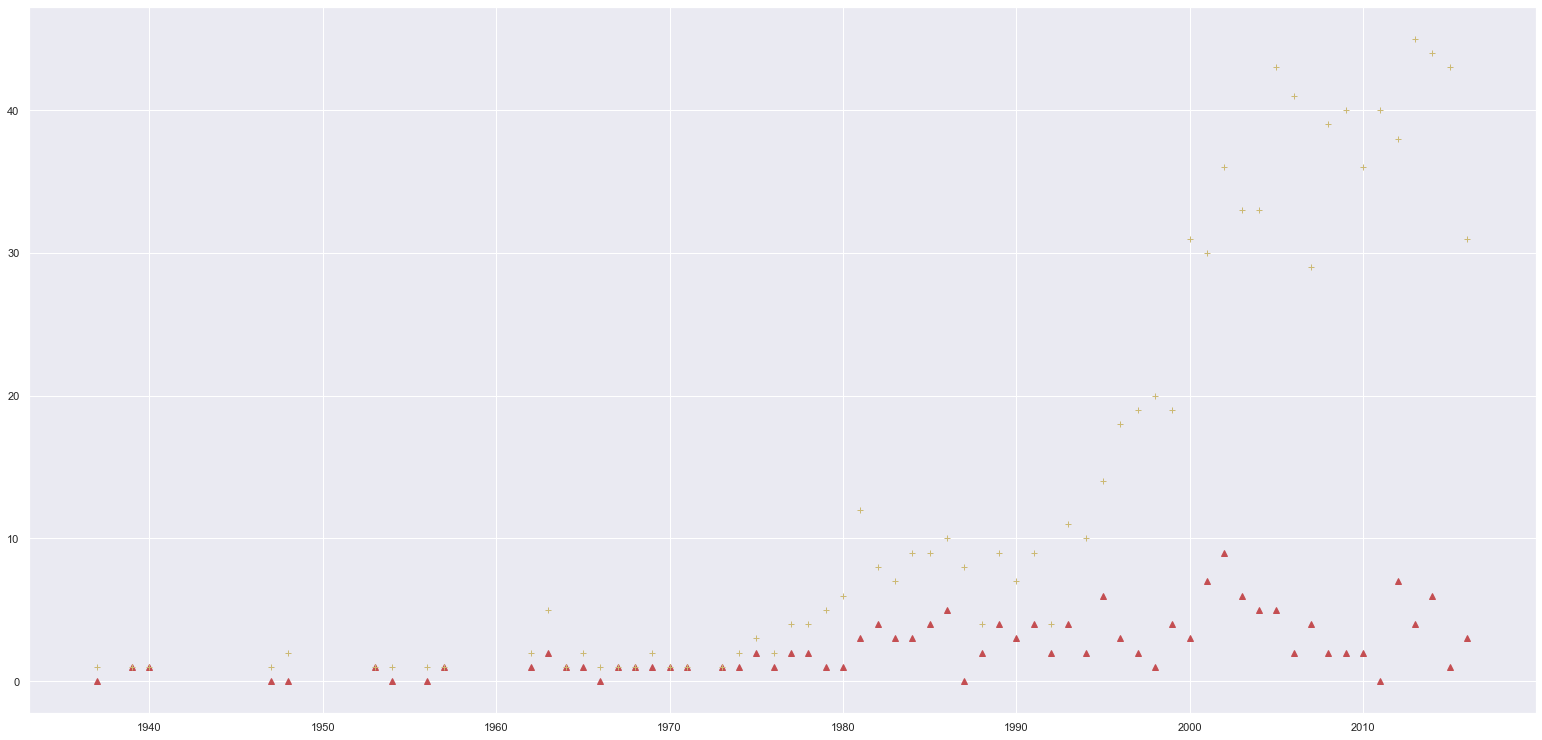

In [1018]:
# график хороших фильмов(красным) и общего количества фильмов за год(жёлтым)
plt.plot(DF_Adventure.groupby('title_year')['film_class'].agg('count').index, DF_Adventure.groupby('title_year')['film_class'].agg('sum').values, 'r^');
plt.plot(DF_Adventure.groupby('title_year')['gross'].agg('count').index, DF_Adventure.groupby('title_year')['gross'].agg('count').values, 'y+');

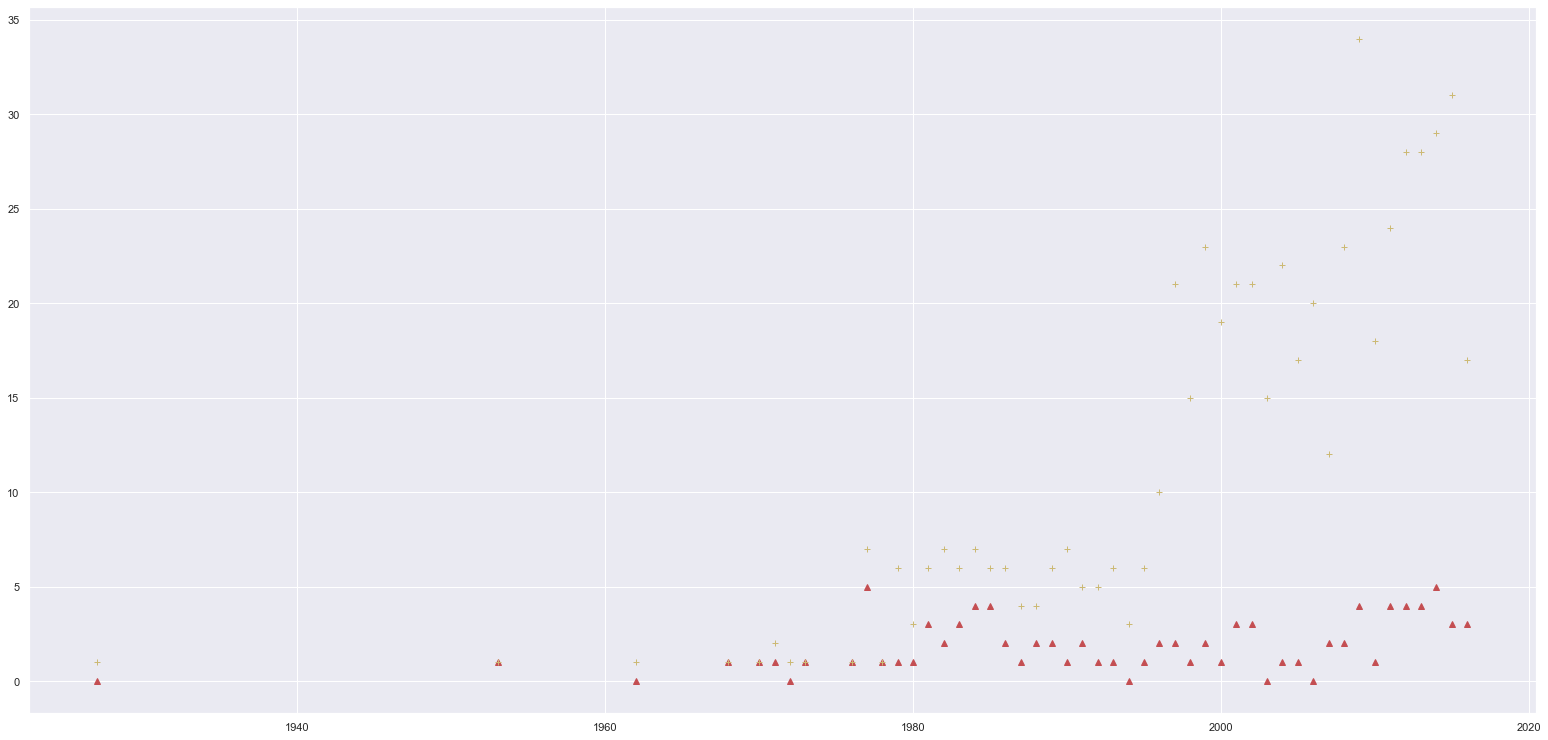

In [1019]:
# график хороших фильмов(красным) и общего количества фильмов за год(жёлтым)
plt.plot(DF_Sci_Fi.groupby('title_year')['film_class'].agg('count').index, DF_Sci_Fi.groupby('title_year')['film_class'].agg('sum').values, 'r^');
plt.plot(DF_Sci_Fi.groupby('title_year')['gross'].agg('count').index, DF_Sci_Fi.groupby('title_year')['gross'].agg('count').values, 'y+');

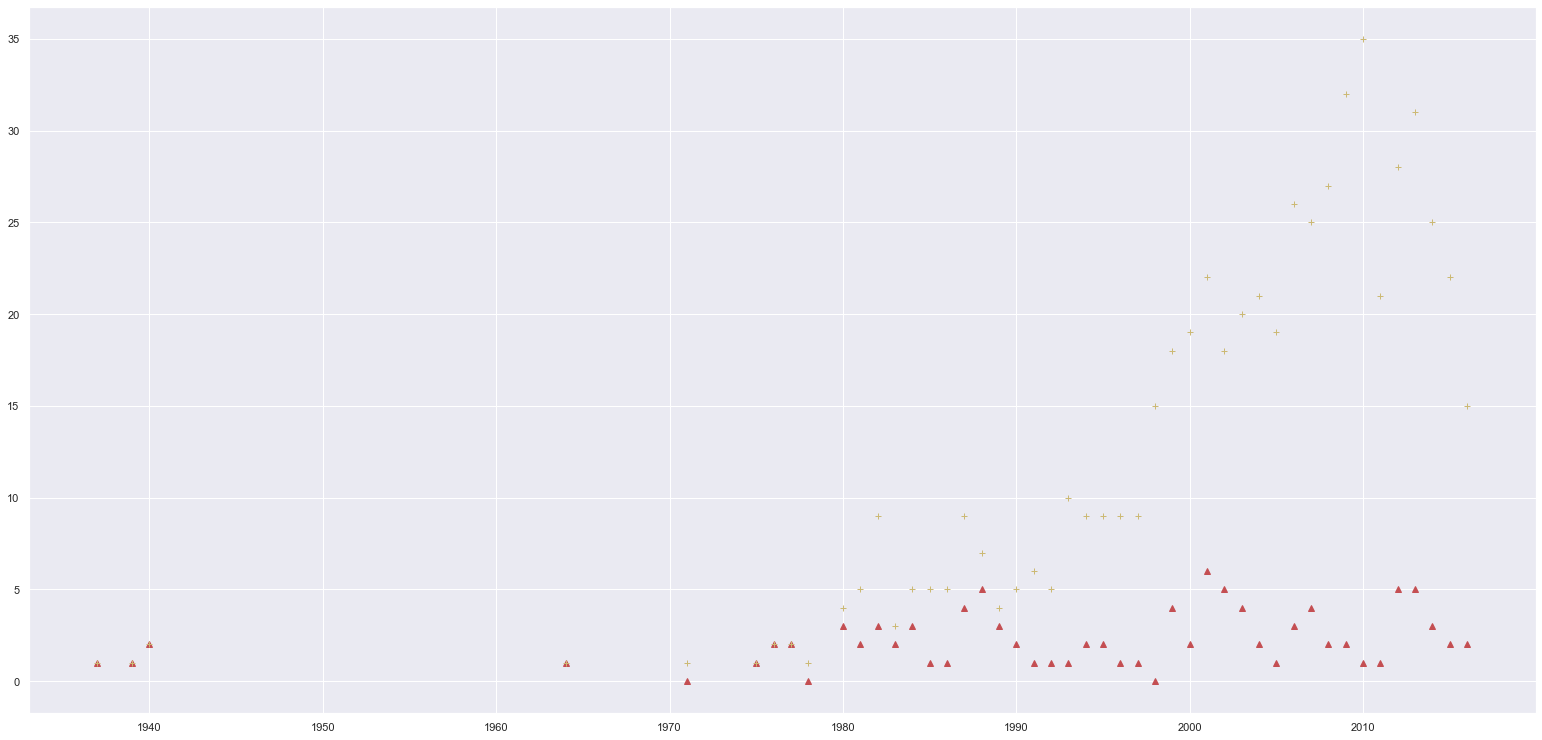

In [1020]:
# график хороших фильмов(красным) и общего количества фильмов за год(жёлтым)
plt.plot(DF_Fantasy.groupby('title_year')['film_class'].agg('count').index, DF_Fantasy.groupby('title_year')['film_class'].agg('sum').values, 'r^');
plt.plot(DF_Fantasy.groupby('title_year')['gross'].agg('count').index, DF_Fantasy.groupby('title_year')['gross'].agg('count').values, 'y+');

# тут проделаем всё то же с датасетом по вестернам. модель уже обучена

In [1250]:
DF_Western['year_class'].value_counts(normalize=True)

0   0.758
1   0.242
Name: year_class, dtype: float64

In [1251]:
DF_Western['marga_coef'] = DF_Western['marga_coef'].apply(lambda x:  1 if x > 1.1 else 0)
DF_Western['imdb_score'] = DF_Western['imdb_score'].apply(lambda x: 1 if x > 4.3 else 0)

In [1252]:
pred_v4 = cat_model.predict(DF_Western[X])
print(classification_report(DF_Western[y], pred_v4))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        52
           1       1.00      0.46      0.63        39

    accuracy                           0.77        91
   macro avg       0.86      0.73      0.73        91
weighted avg       0.84      0.77      0.75        91



In [1253]:
feature_importances_DF_Western = zip(DF_Western[X].columns, cat_model.feature_importances_)
list(feature_importances_DF_Western)


[('title_year', 2.1681851637854925),
 ('gross', 10.499985831793166),
 ('budget', 37.404362668286396),
 ('marga', 46.904290722997594),
 ('imdb_score', 1.6579257557573328),
 ('movie_facebook_likes', 0.12315369393968369),
 ('num_voted_users', 1.242096163440353)]

In [1254]:
DF_Western['score_catboost'] = cat_model.predict_proba(DF_Western[X])[:, 1]

In [1255]:

DF_Western['film_class_catboost_thr_05'] = (DF_Western['score_catboost'] > 0.5).astype(int)

In [1256]:

f1_score(DF_Western['film_class'], DF_Western['film_class_catboost_thr_05'])


0.631578947368421

In [1257]:

thrs_DF_Western = []
thrs_DF_Western = [1] + list(DF_Western['score_catboost'].unique())


In [1258]:

cat_result = []
for thr in thrs_DF_Western:
    DF_Western['y_pred_score_catboost'] = (DF_Western['score_catboost'] > thr) * 1
    cat_result.append((thr, f1_score(DF_Western['film_class'], DF_Western['y_pred_score_catboost'])))


In [1259]:

t_DF_Western = pd.DataFrame()

In [1260]:

t_DF_Western = pd.DataFrame(cat_result, columns=['thr', 'f1'])

In [1261]:

t_DF_Western[t_DF_Western['f1'] == t_DF_Western['f1'].max()]

,thr,f1
88,0.009,0.946


In [1262]:
DF_Western['y_pred_best_class_catboost'] = (DF_Western['score_catboost'] > 0.009).astype(int)

In [1263]:

f1_score(DF_Western['film_class'], DF_Western['y_pred_best_class_catboost'])

0.9210526315789475

In [1264]:

f1_score(DF_Western['film_class'], DF_Western['film_class_catboost_thr_05'])

0.631578947368421

In [1265]:

DF_Western['year_class'].value_counts(normalize=True)

0   0.758
1   0.242
Name: year_class, dtype: float64

In [1266]:

DF_Western['y_pred_best_class_catboost'].value_counts(normalize=True)

0   0.593
1   0.407
Name: y_pred_best_class_catboost, dtype: float64

In [1267]:

DF_Western['film_class_catboost_thr_05'].value_counts(normalize=True)

0   0.802
1   0.198
Name: film_class_catboost_thr_05, dtype: float64

In [1268]:
DF_Western['y_pred_best_class_catboost'].value_counts(normalize=True)

0   0.593
1   0.407
Name: y_pred_best_class_catboost, dtype: float64

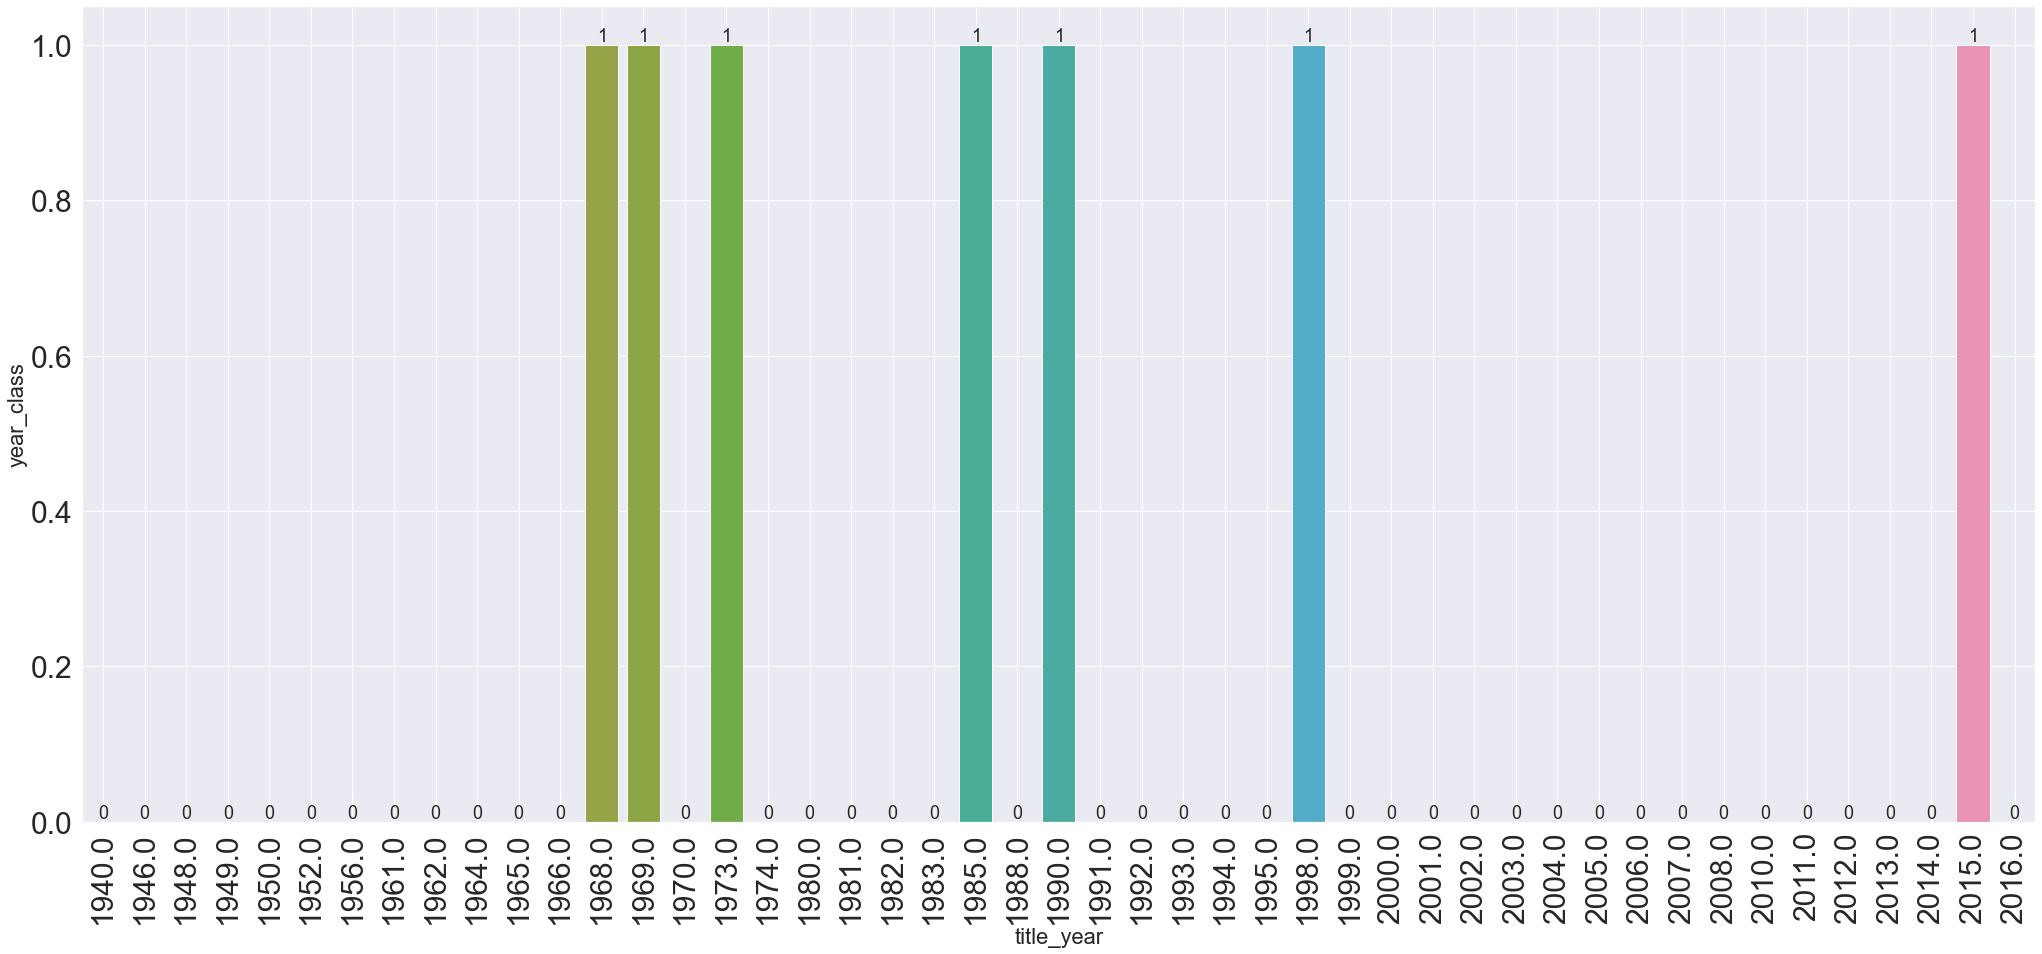

In [1273]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class', data=DF_Western)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

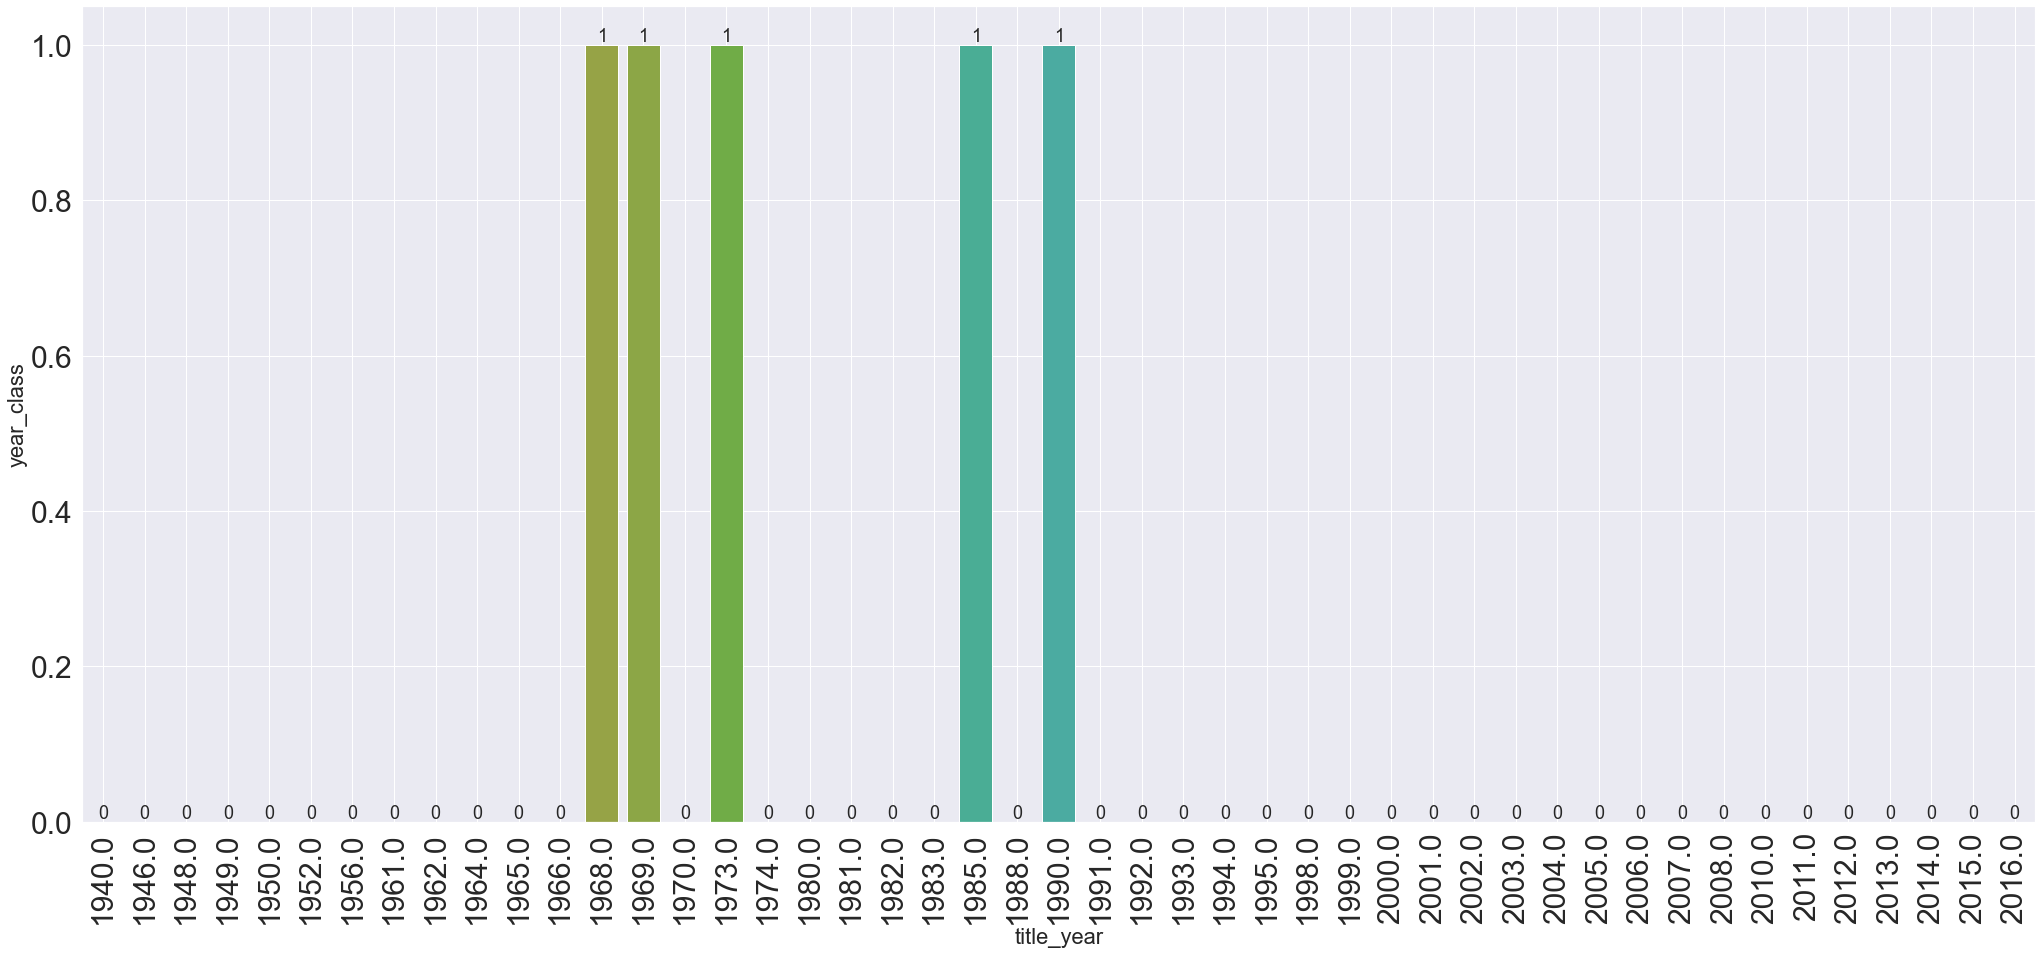

In [1275]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_best', data=DF_Western)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

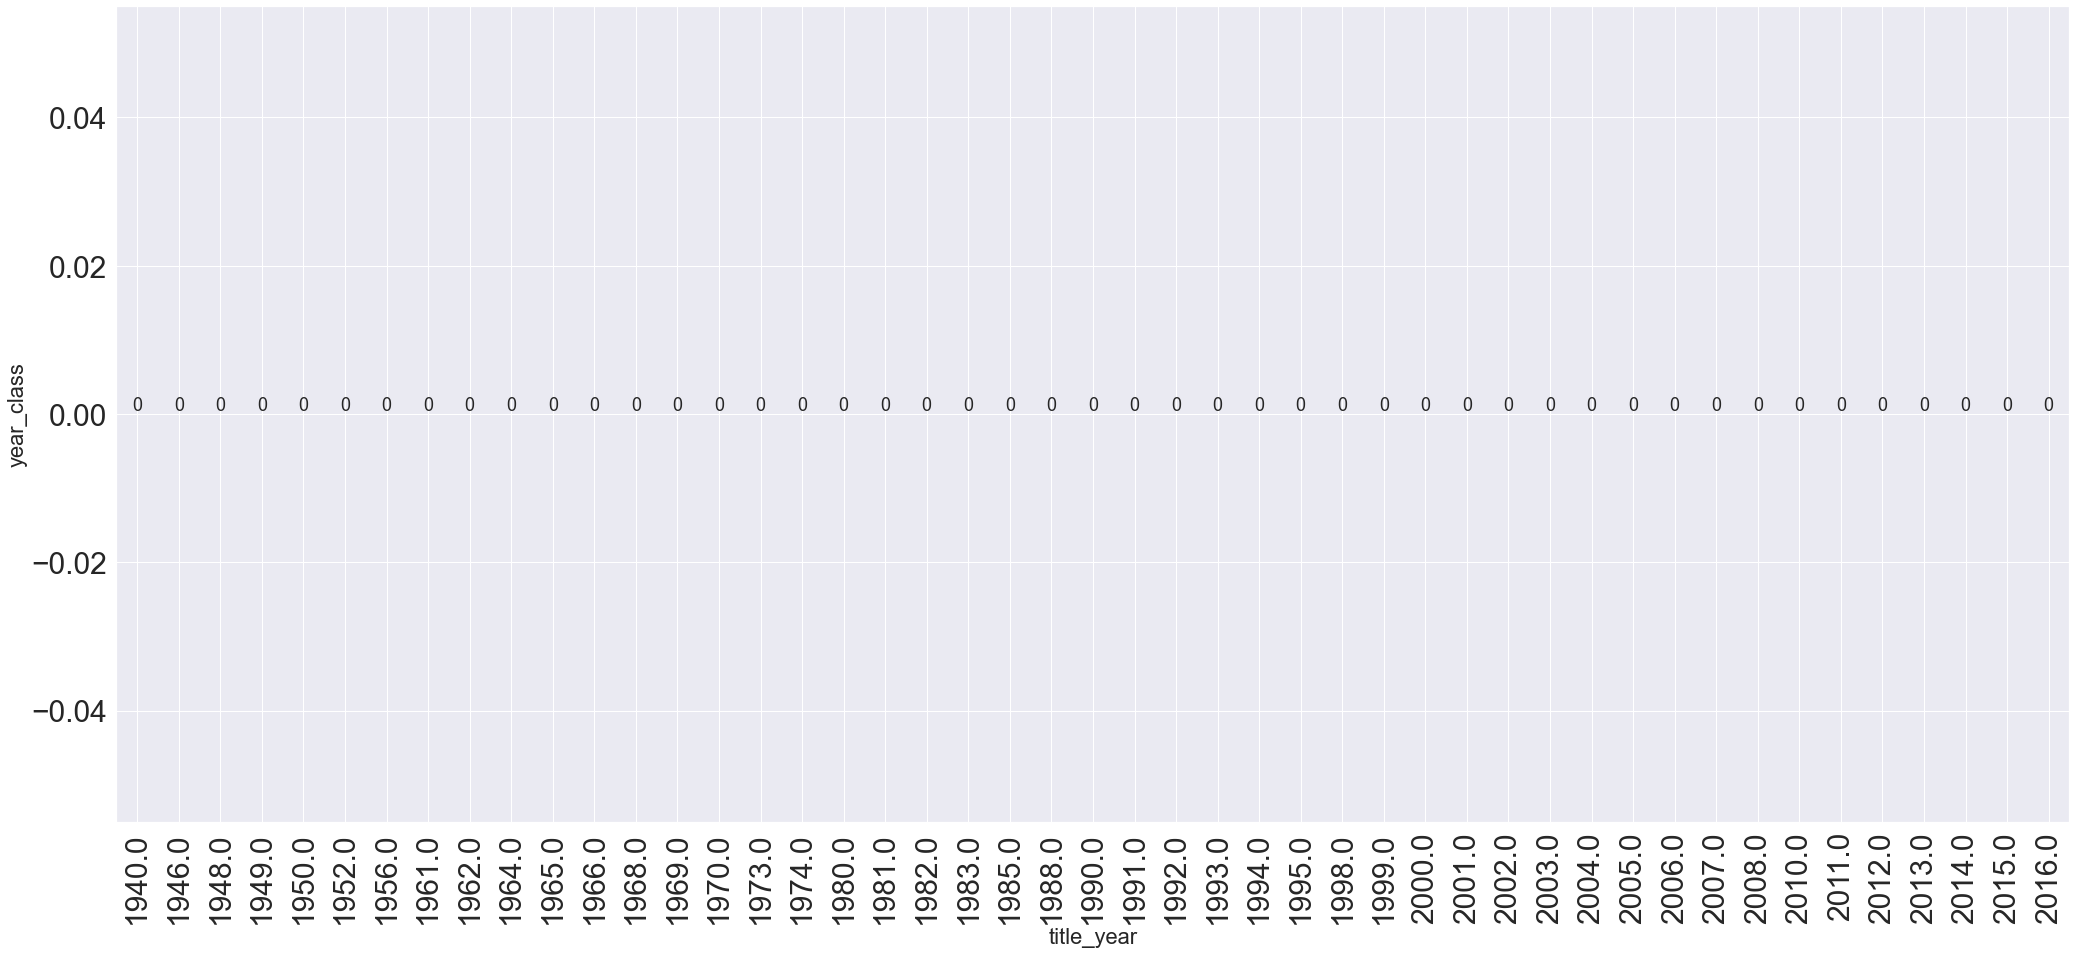

In [1277]:
plt.figure(figsize=(35,15))
chart = sns.barplot(x='title_year', y='year_class_catboost_thr_05', data=DF_Western)
plt.grid(True)
chart.bar_label(chart.containers[0], fontsize=18)
plt.xlabel('title_year', fontsize=22)
plt.ylabel('year_class', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=30)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()